In [1]:
# Import packages to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os,sys
import re
import pickle
from scipy.stats import circstd
from scipy.stats import circmean
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [2]:
os.getcwd()[-18:]

'ler/11022022_h3000'

In [47]:
# Load the entire sextupole kicks dataframe
df3all = pd.read_csv("h3000all.csv")
df3all = df3all.dropna()

In [48]:
# Define BPM data to analyze
bpmstoanalyze = np.unique(df3all['bpm'])

In [5]:
# Try creating directory to save figures for bare machine analysis
#try:
    #os.makedirs('bare-machine-analysis')
#except:
    #print('Directory already exists')

# Try creating directory to save figures for bare machine analysis
# try:
#     os.makedirs('bare-machine-analysis')
# except:
#     print('Directory already exists')

# Create cmap for same BPM amplitudes
cmap4 = mpl.cm.get_cmap(name='autumn')
cmapdf = df3all[(df3all['sext-current'] == 0.0) & (df3all['abs(h_jklm)'] != 0.0)]['abs(h_jklm)']
normalize4 = mpl.colors.Normalize(vmin=1000*min(cmapdf), vmax=1000*max(cmapdf))
# Set date
date = '11/02/2022'

# Window
window = [50, 1500]

/var/folders/3d/pnyvn_yx0v76lxfnqkf1vt1r0000j7/T/ipykernel_87385/1288508892.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap4 = mpl.cm.get_cmap(name='autumn')


<>:70: SyntaxWarning: invalid escape sequence '\p'
<>:70: SyntaxWarning: invalid escape sequence '\p'
/var/folders/3d/pnyvn_yx0v76lxfnqkf1vt1r0000j7/T/ipykernel_87385/958346248.py:70: SyntaxWarning: invalid escape sequence '\p'
  fig.suptitle('%s: (%.4f $\pm$ %.4f) @ (%.1f $\pm$ %.1f)°'%(bpmi[2:],bareampmean, bareampstd, barephasemean*180/np.pi, barephasestd*180/np.pi),


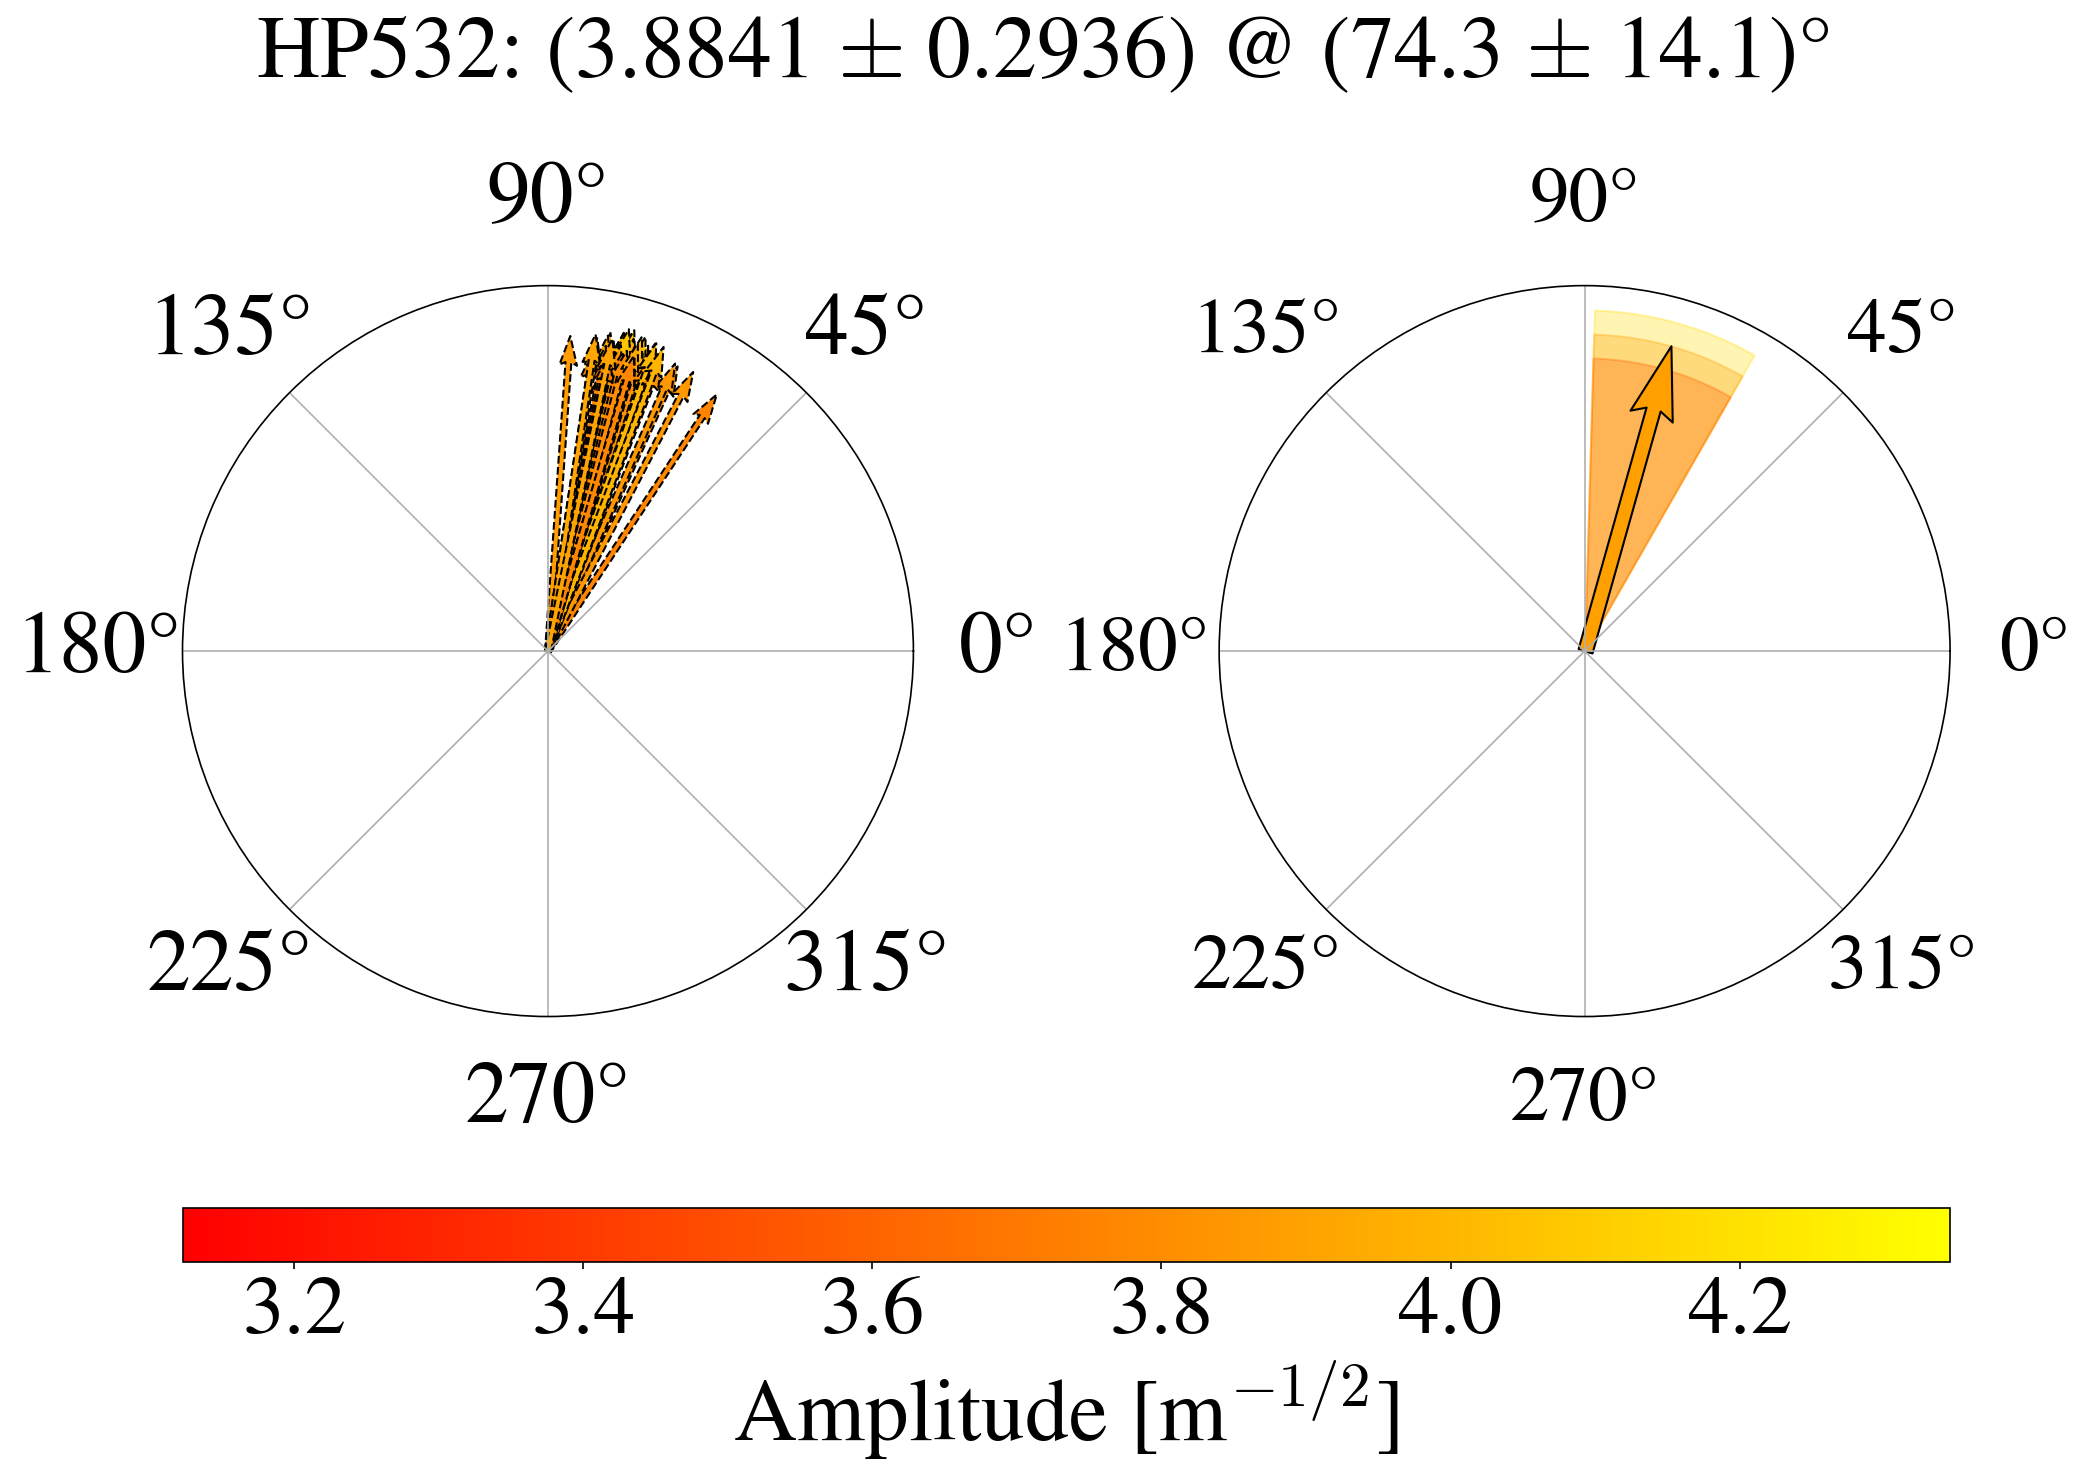

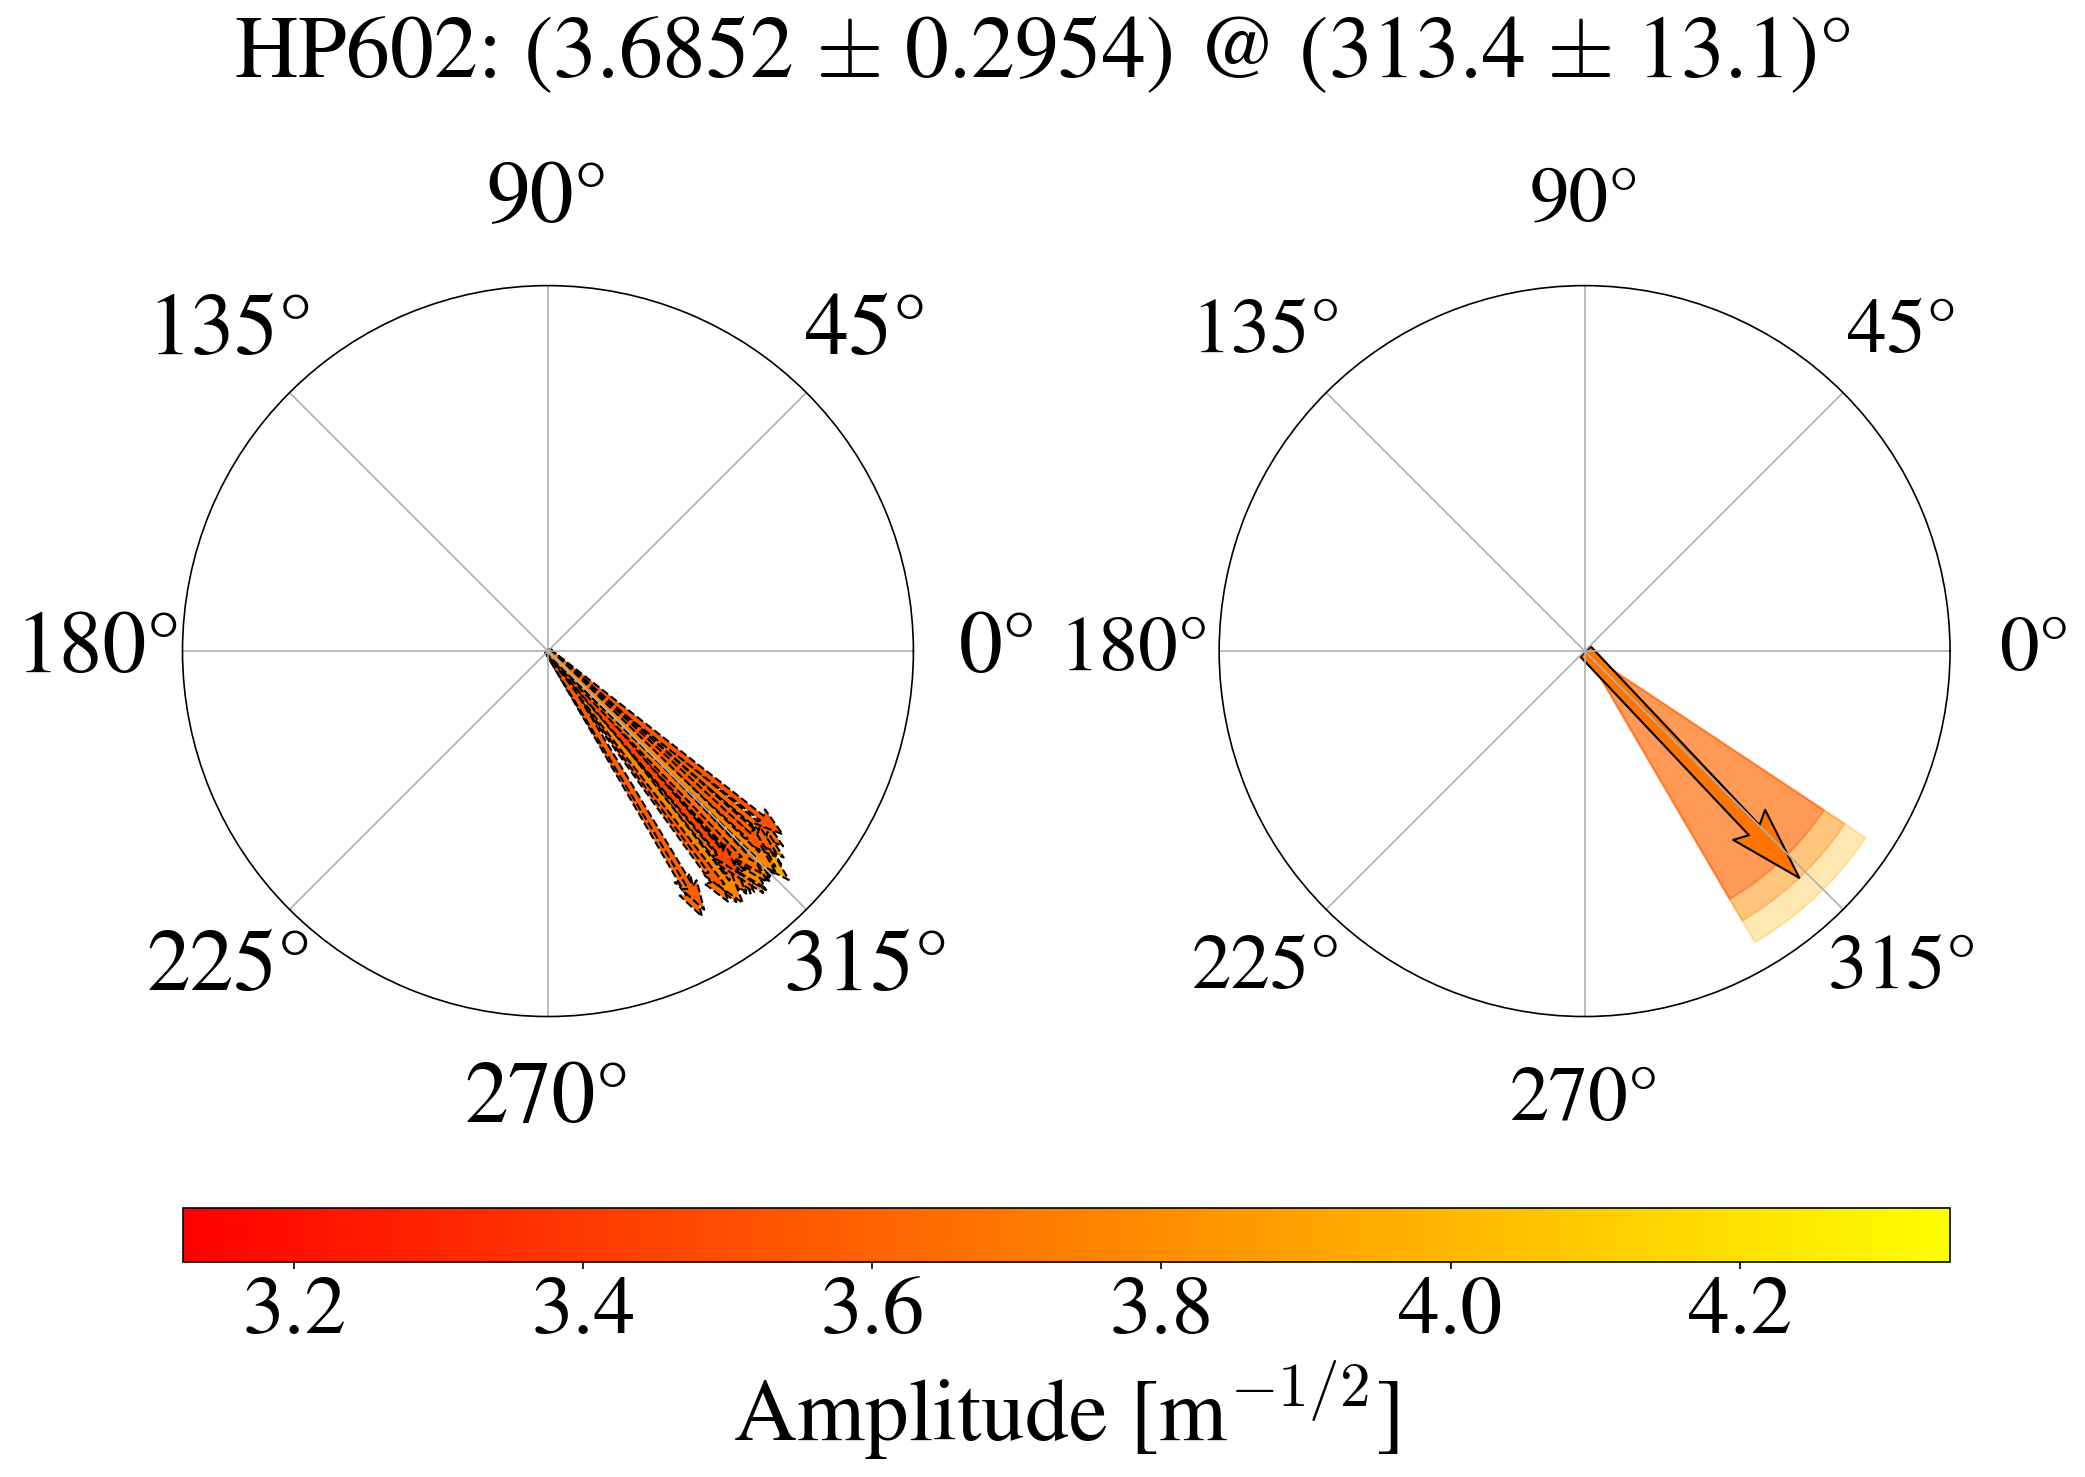

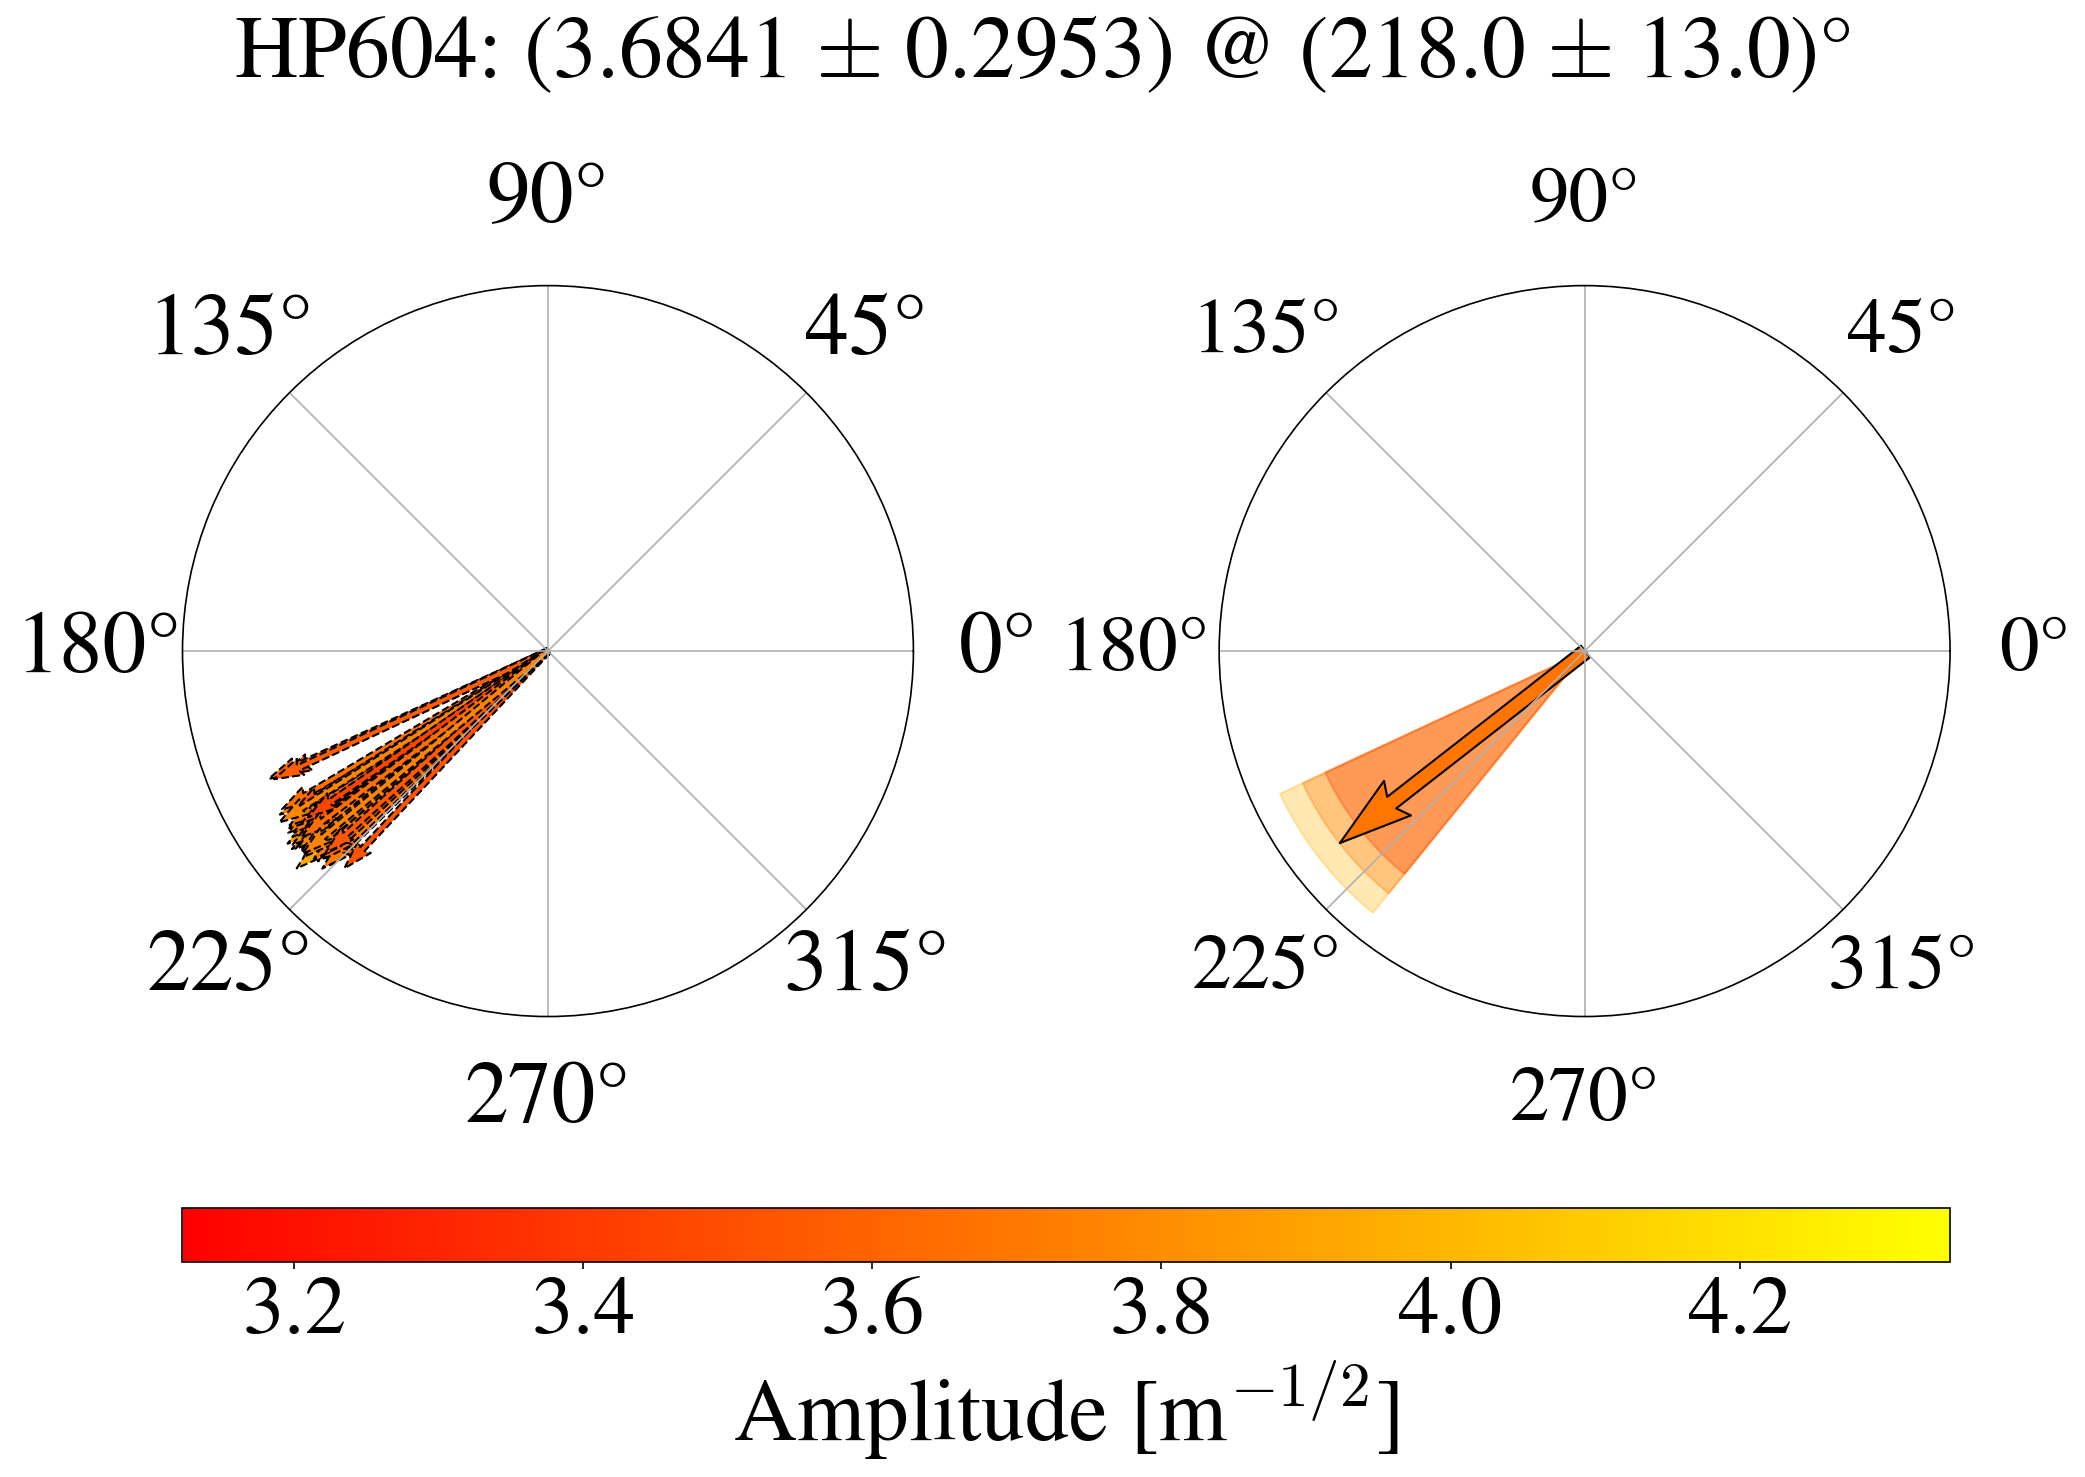

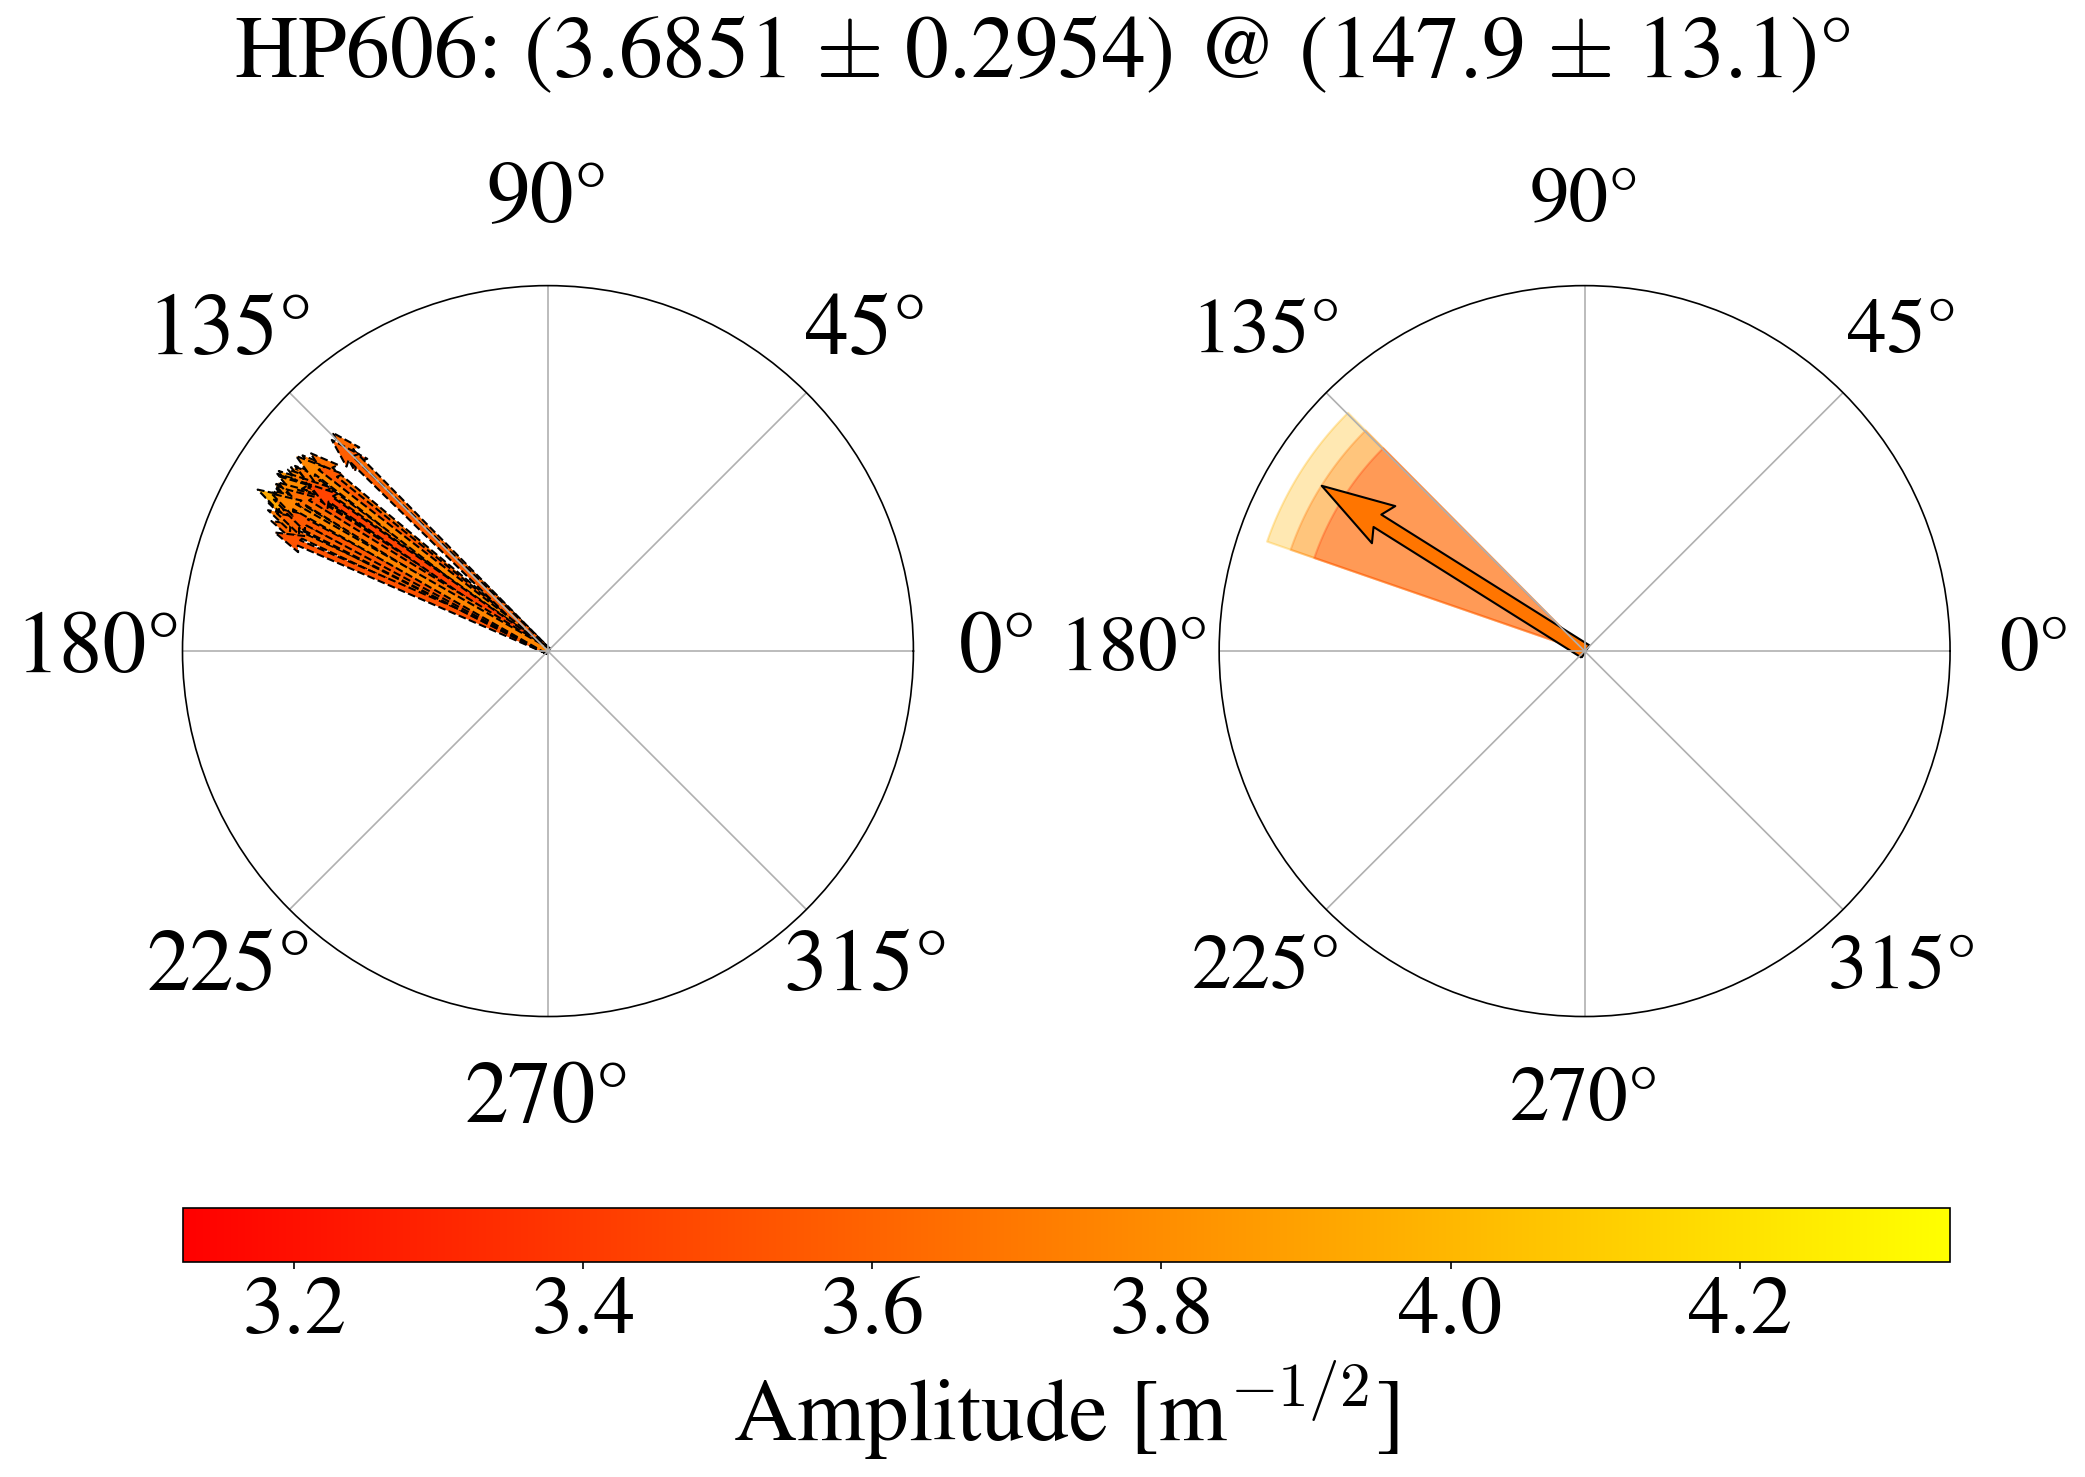

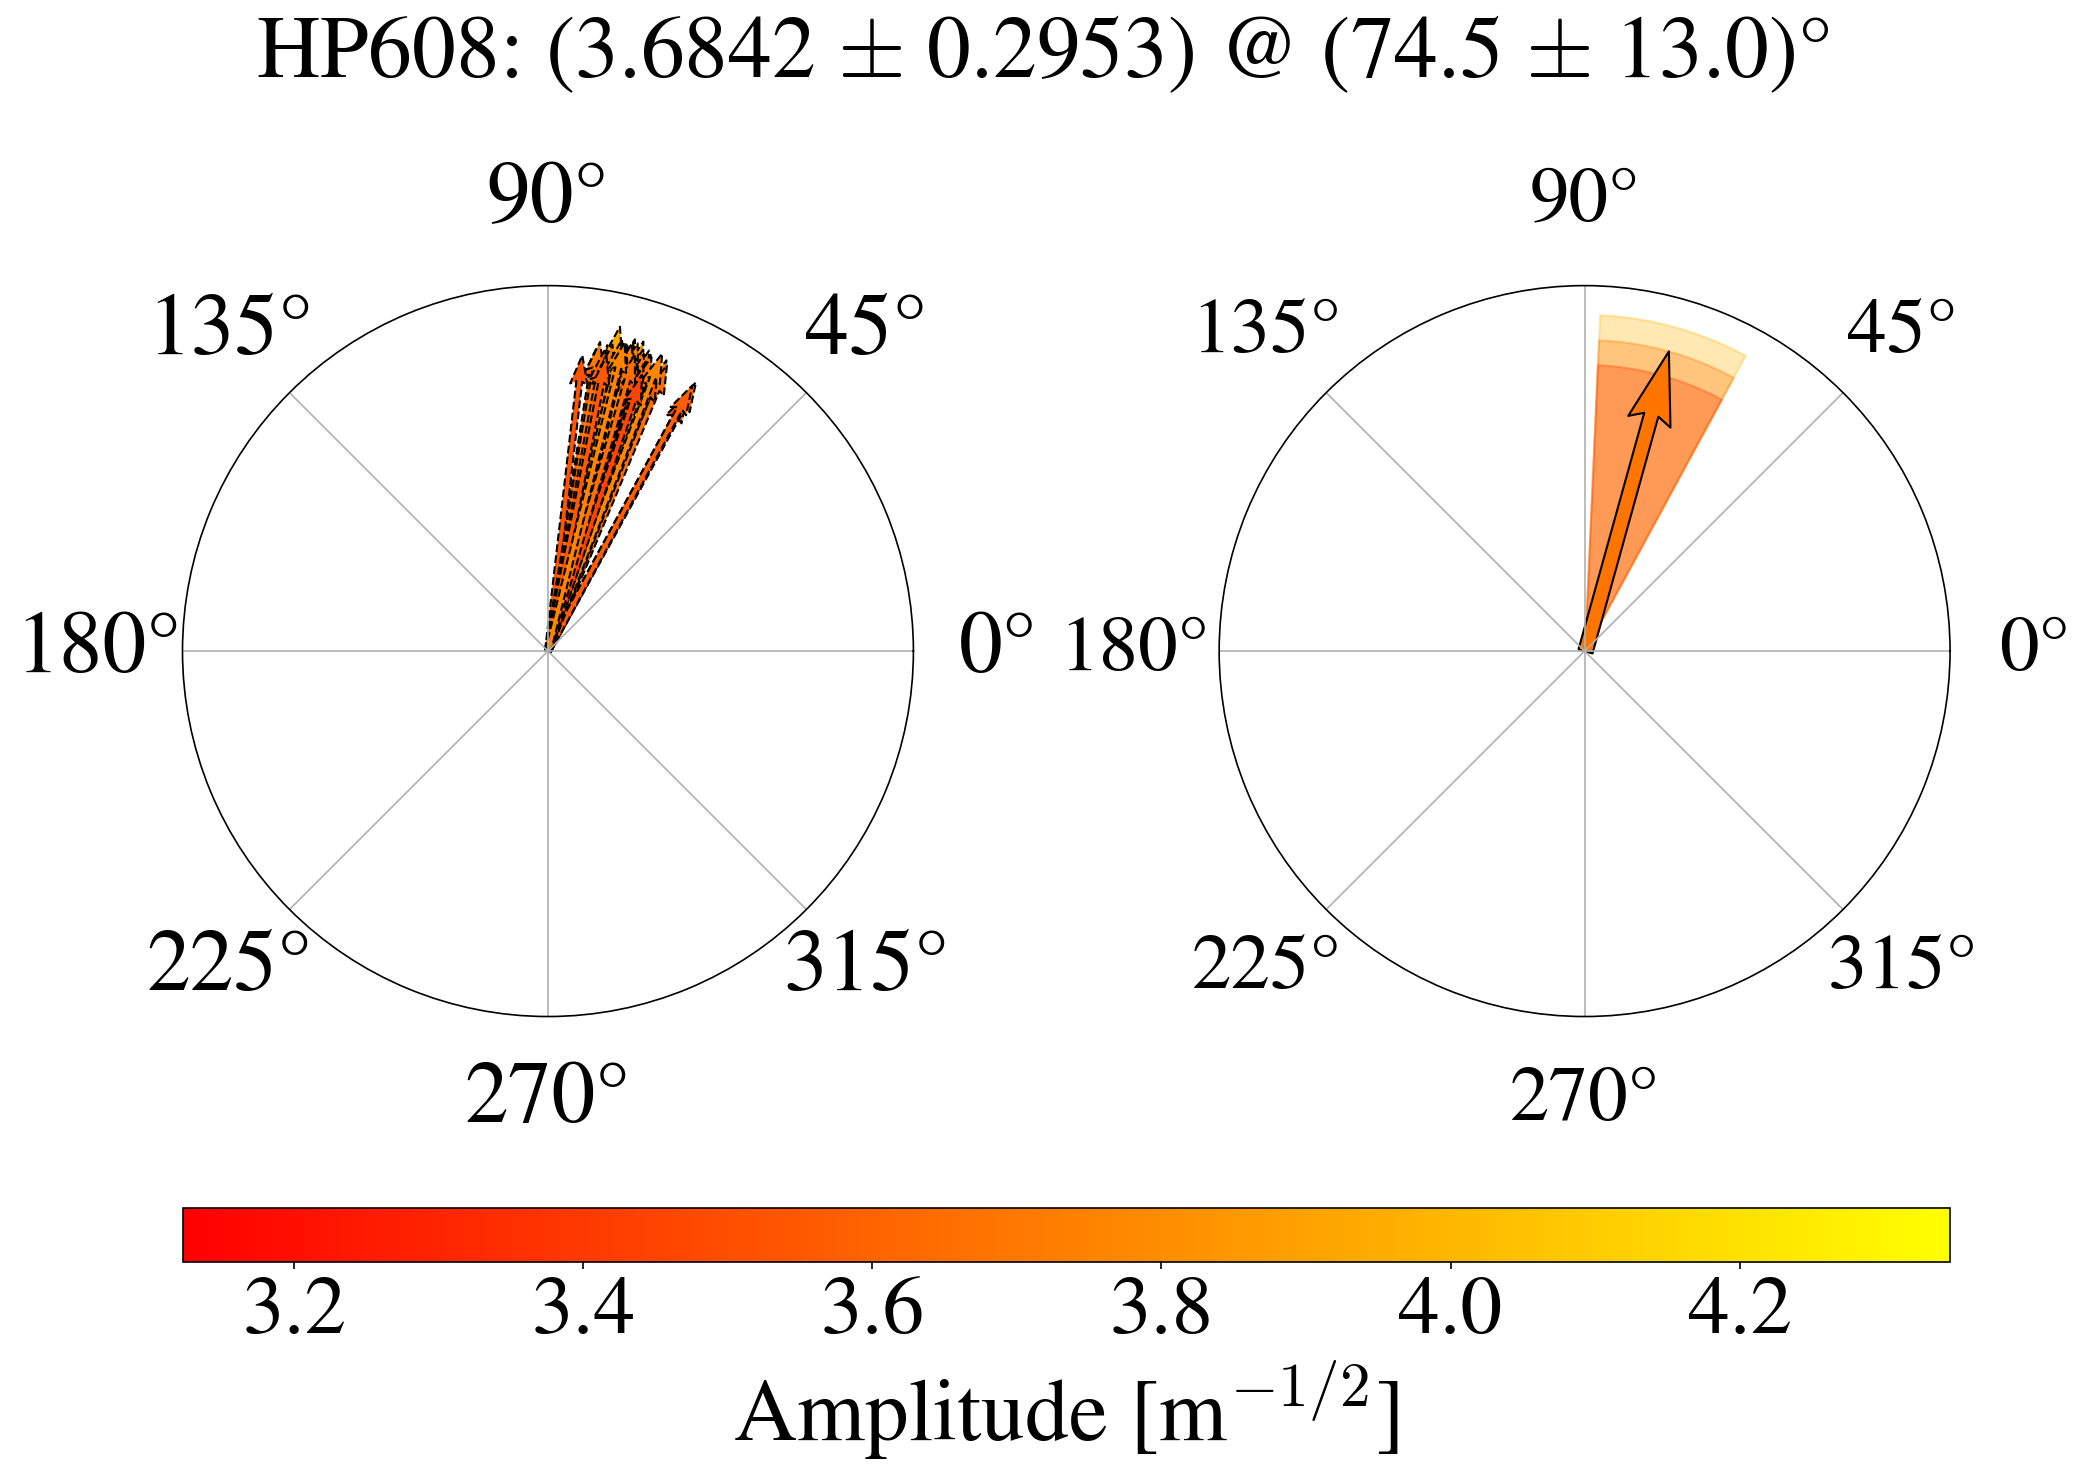

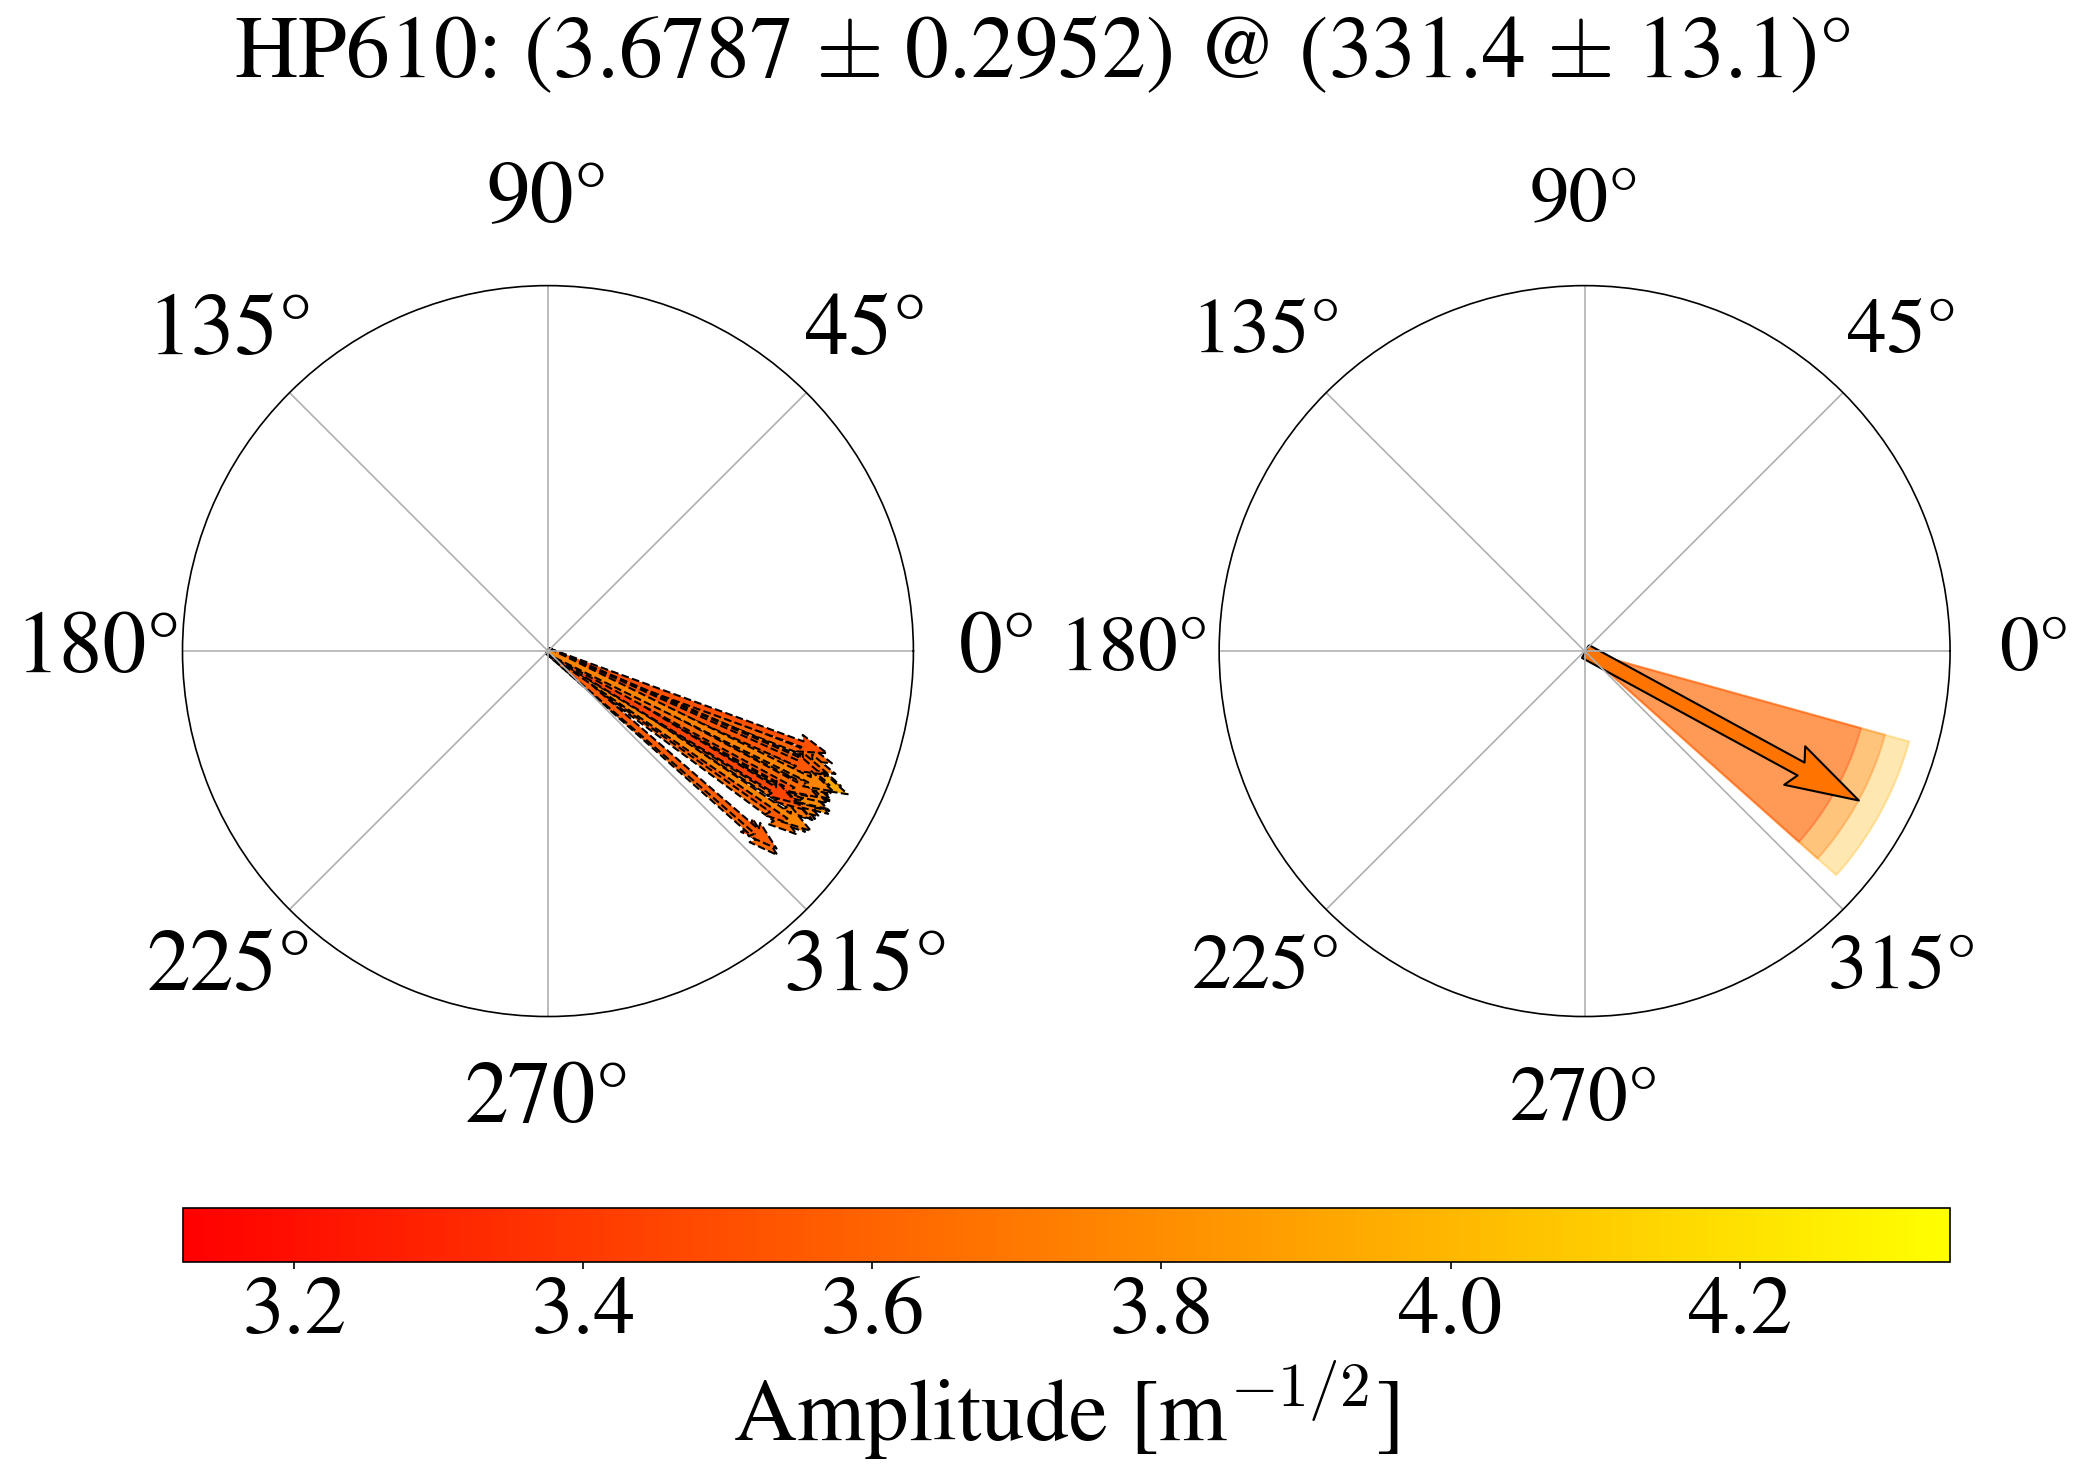

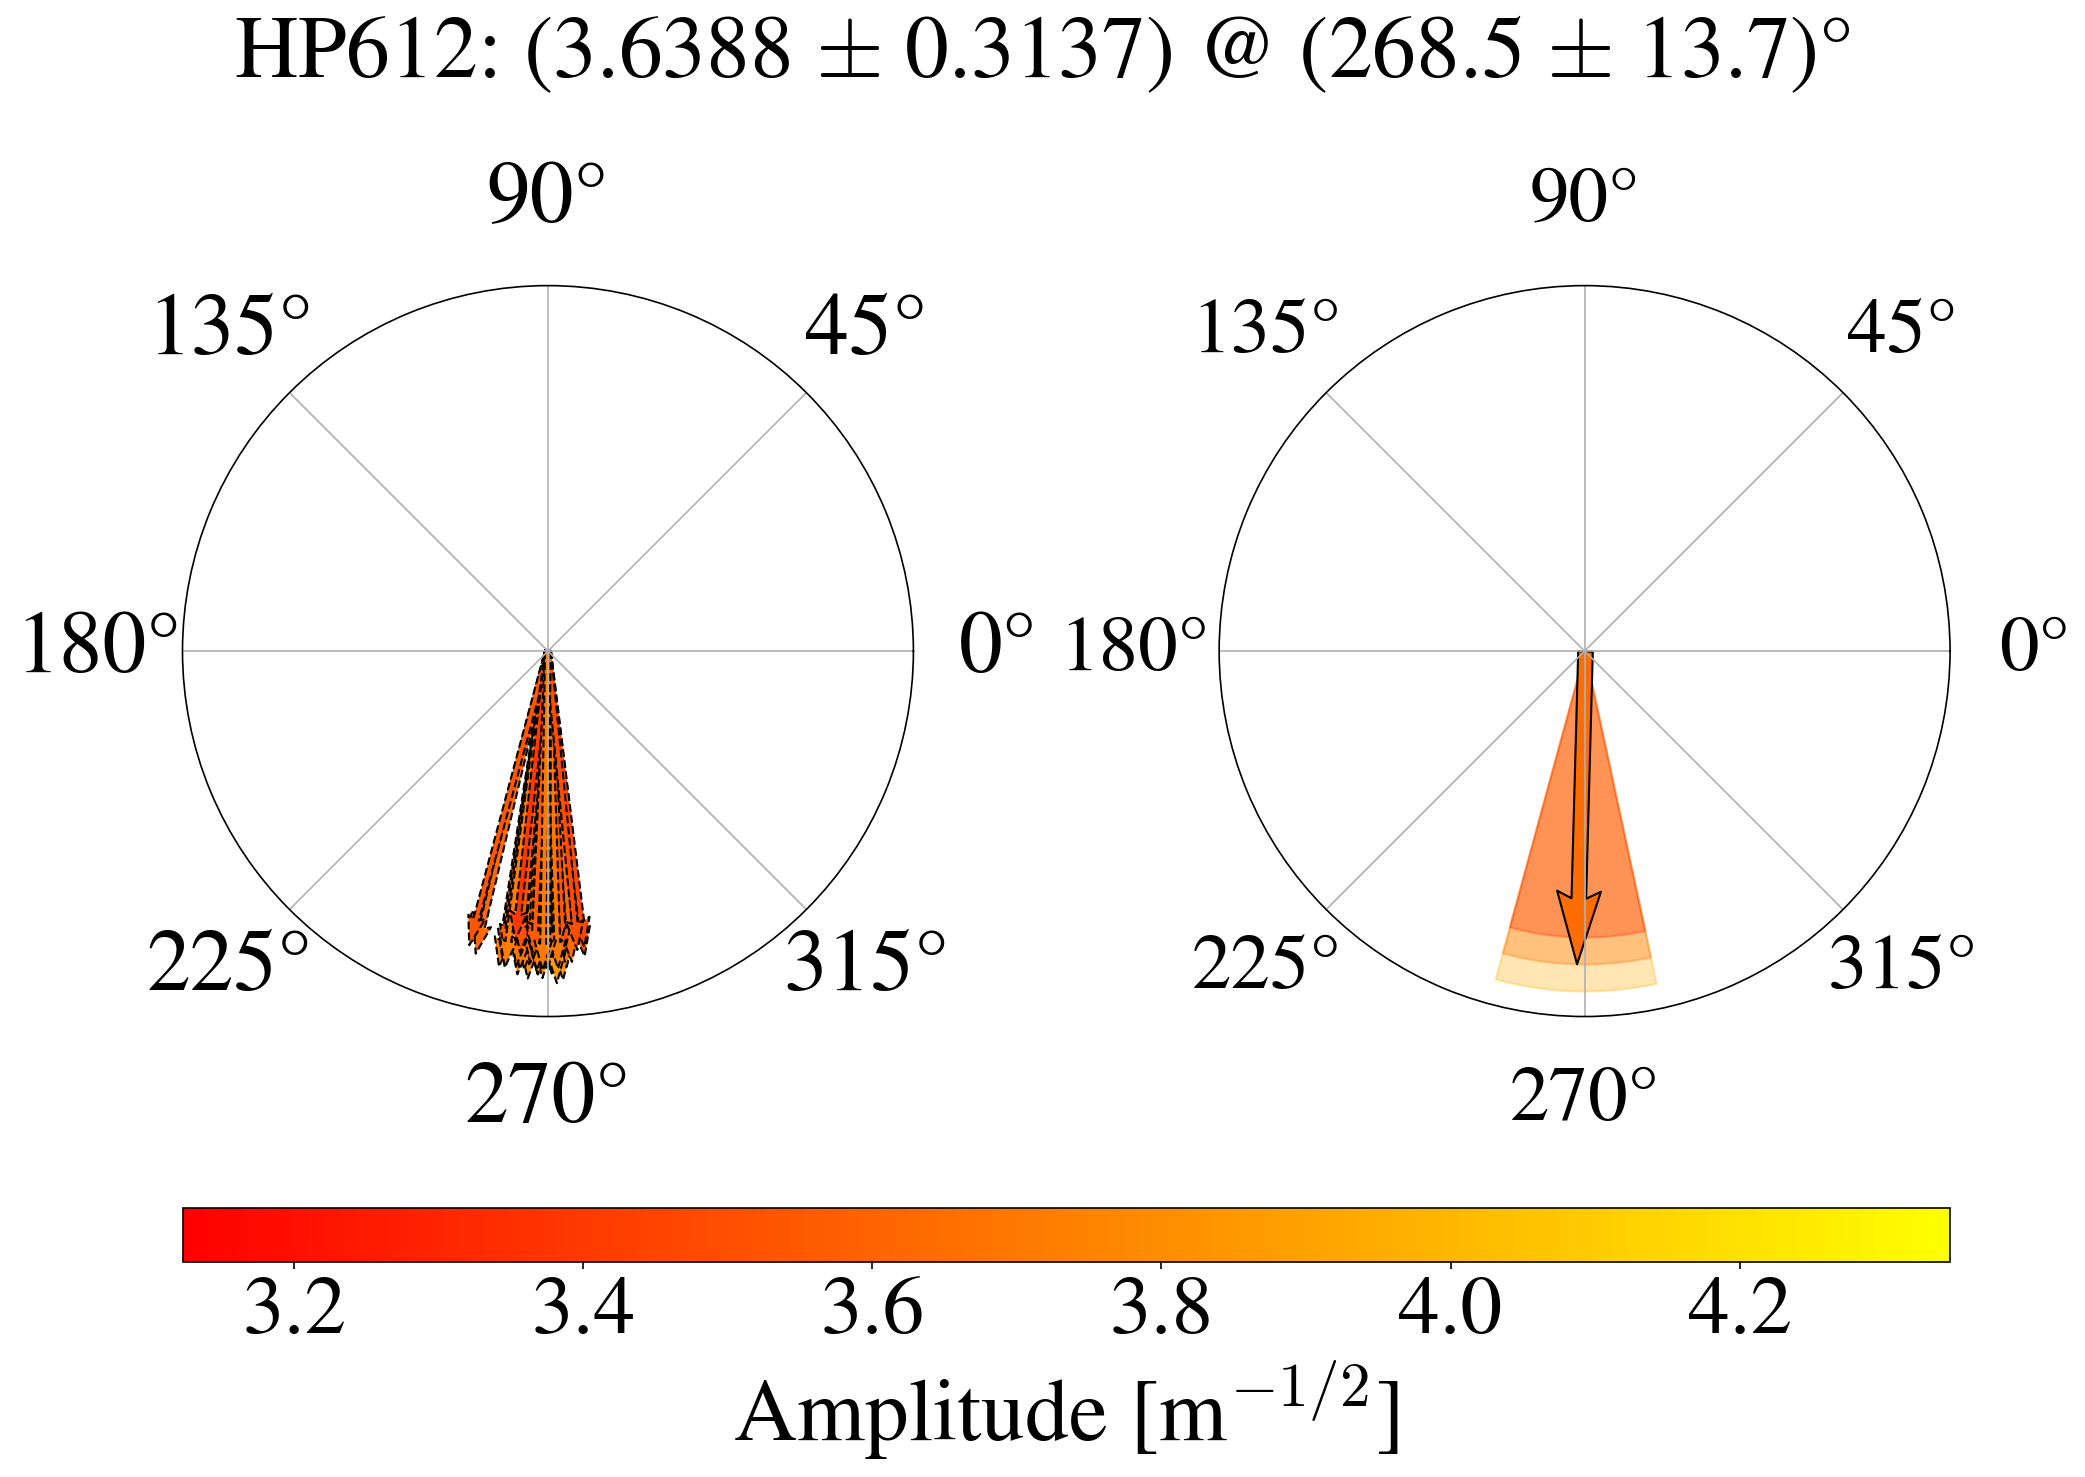

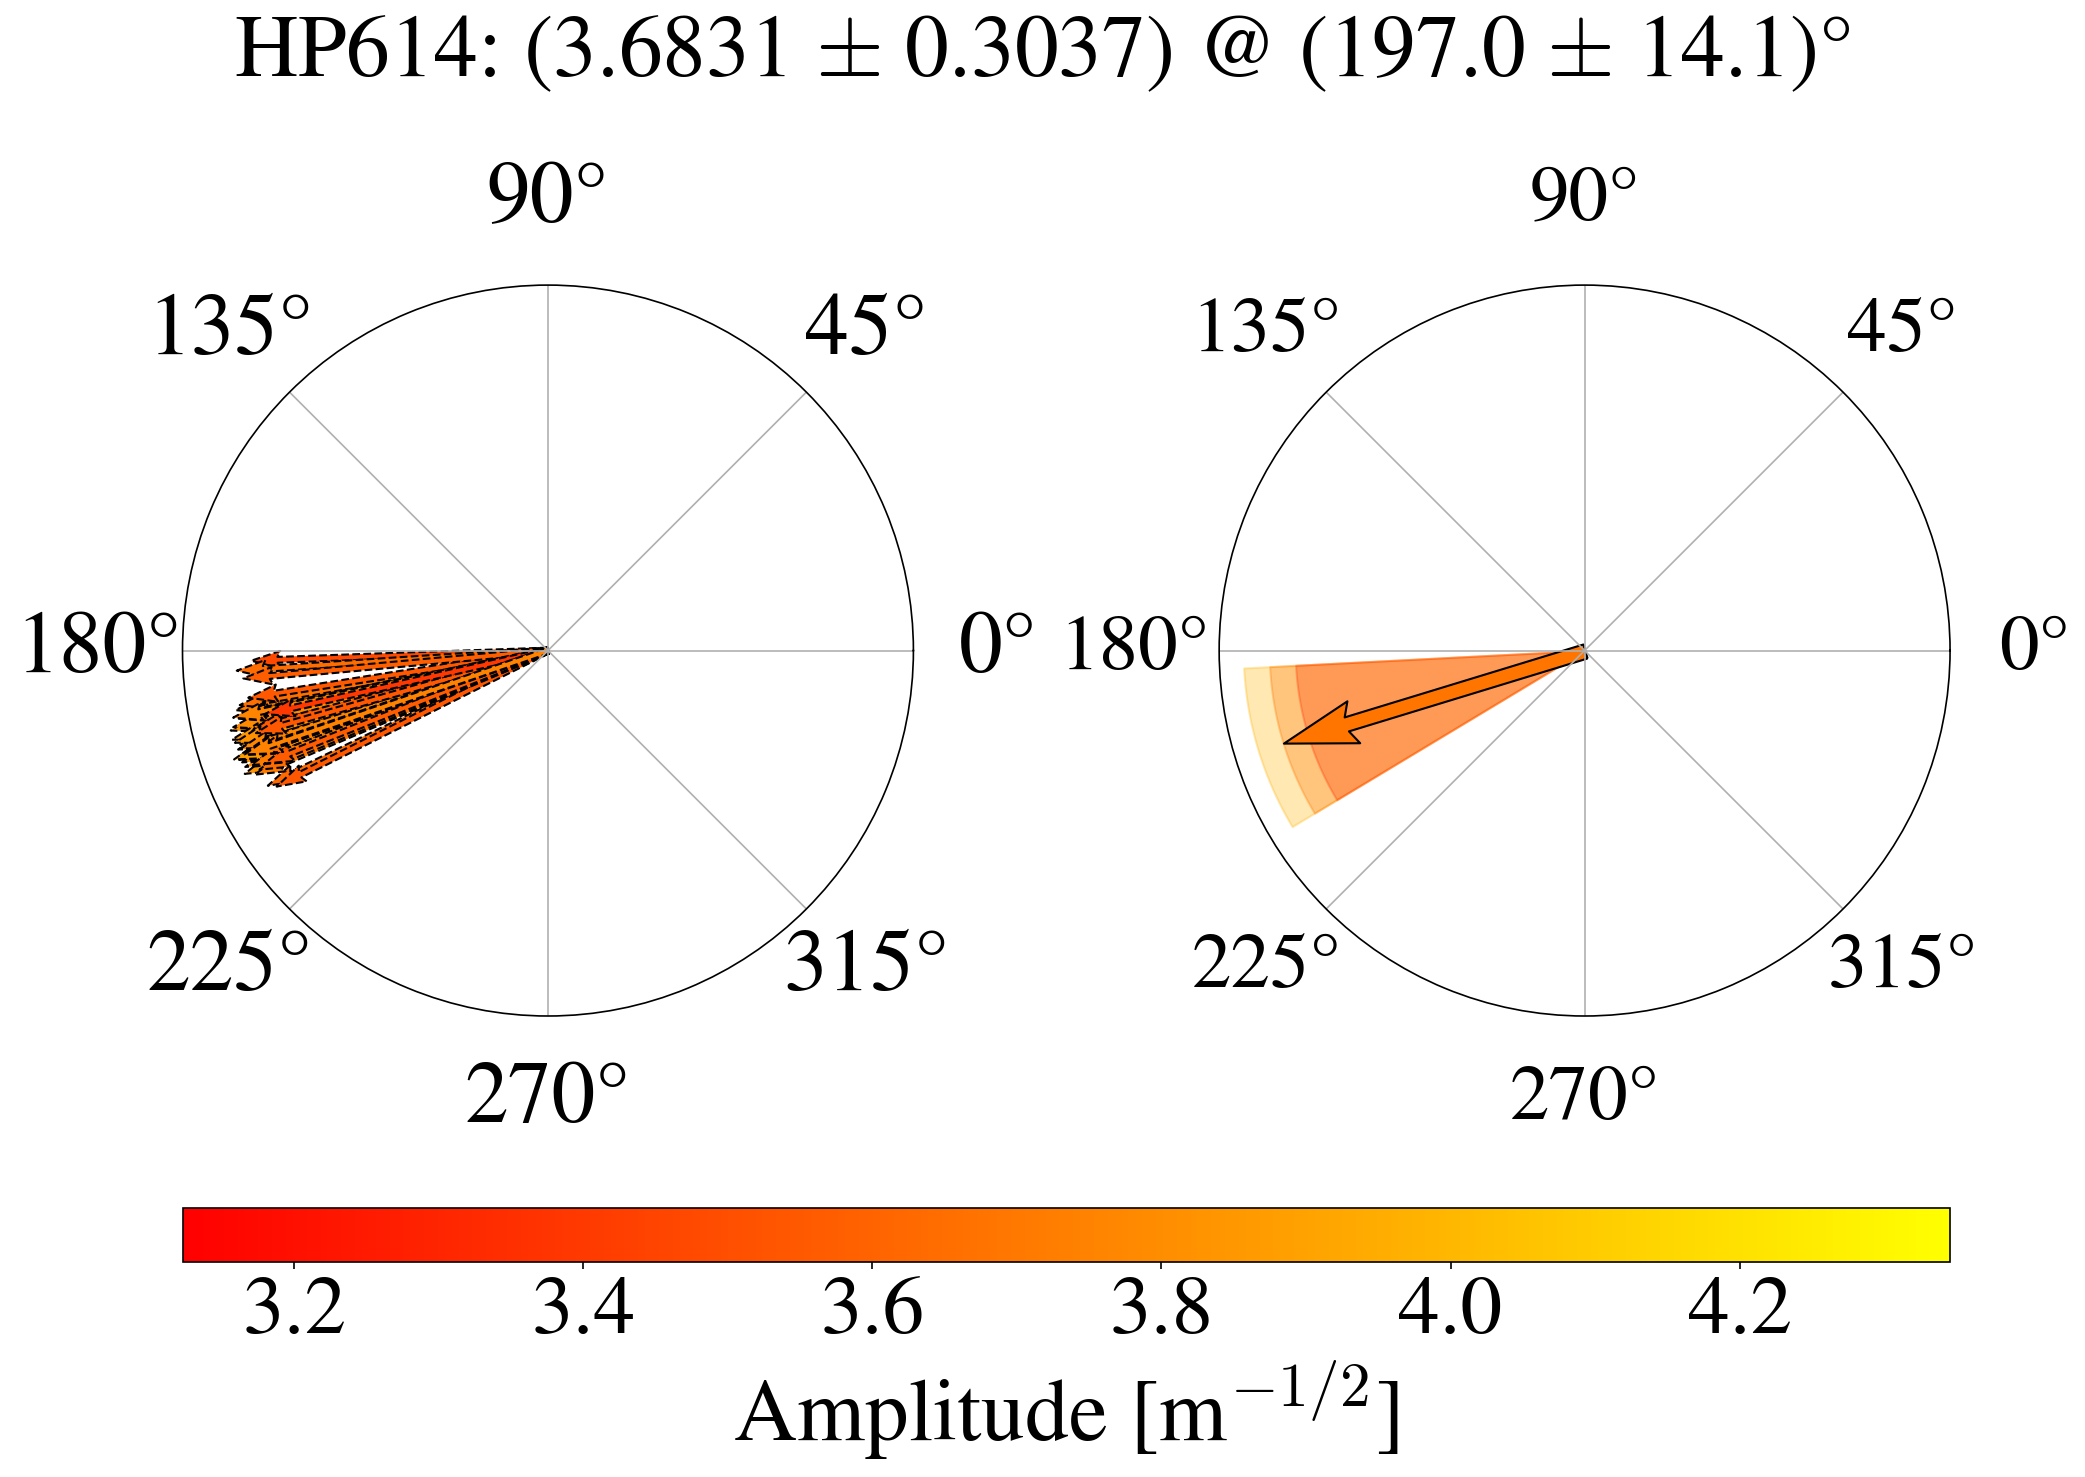

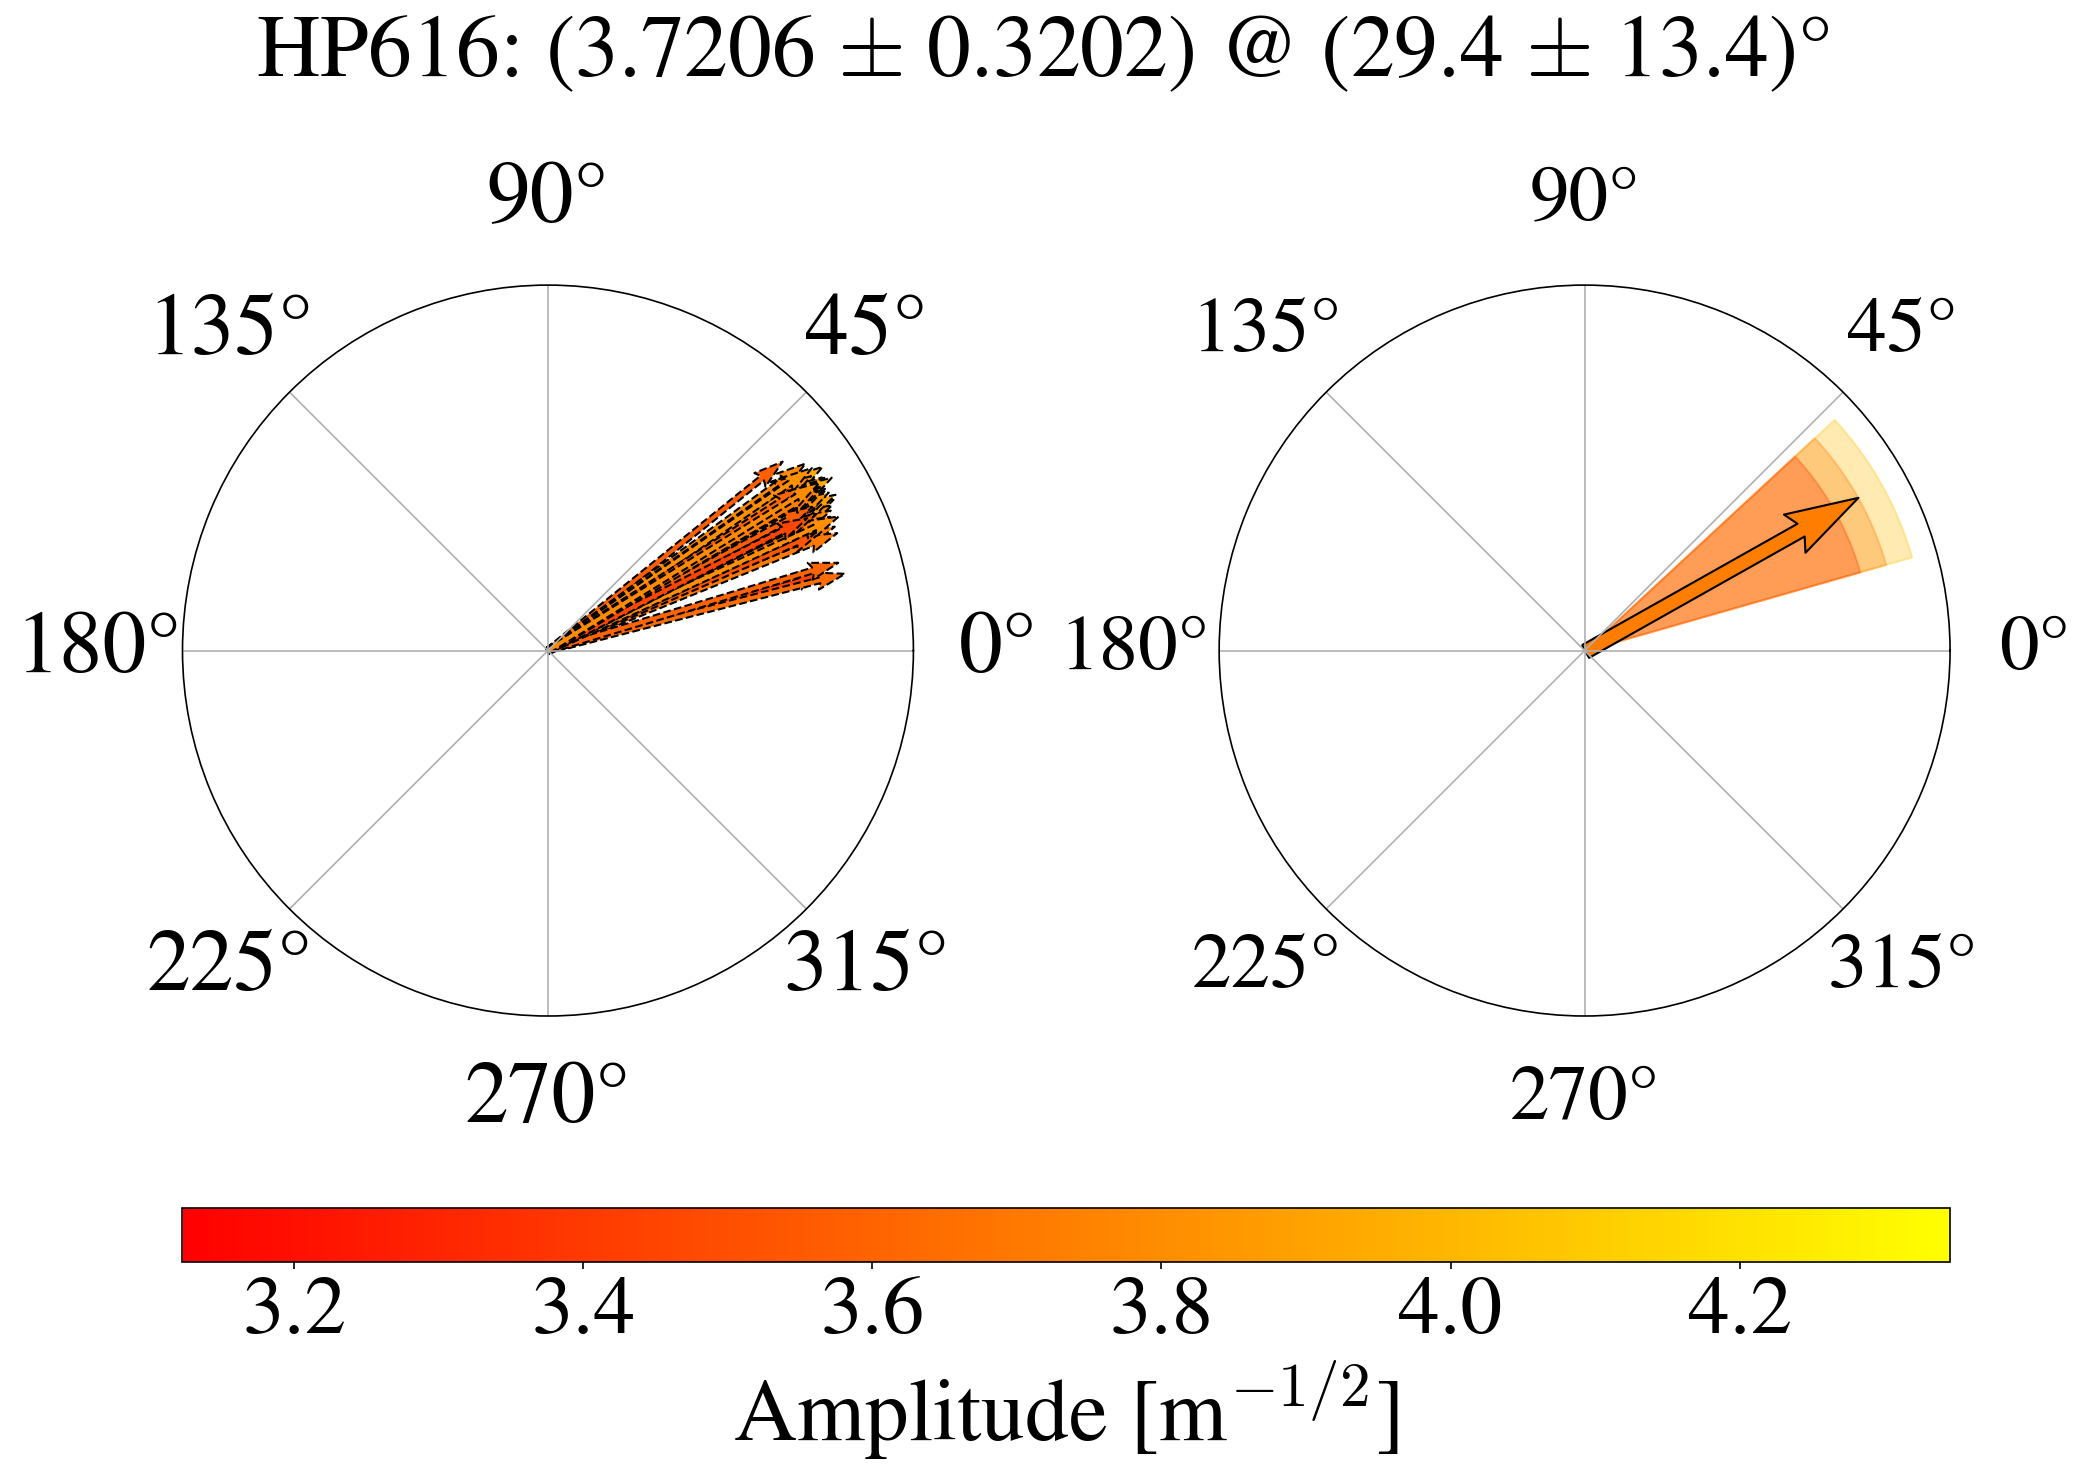

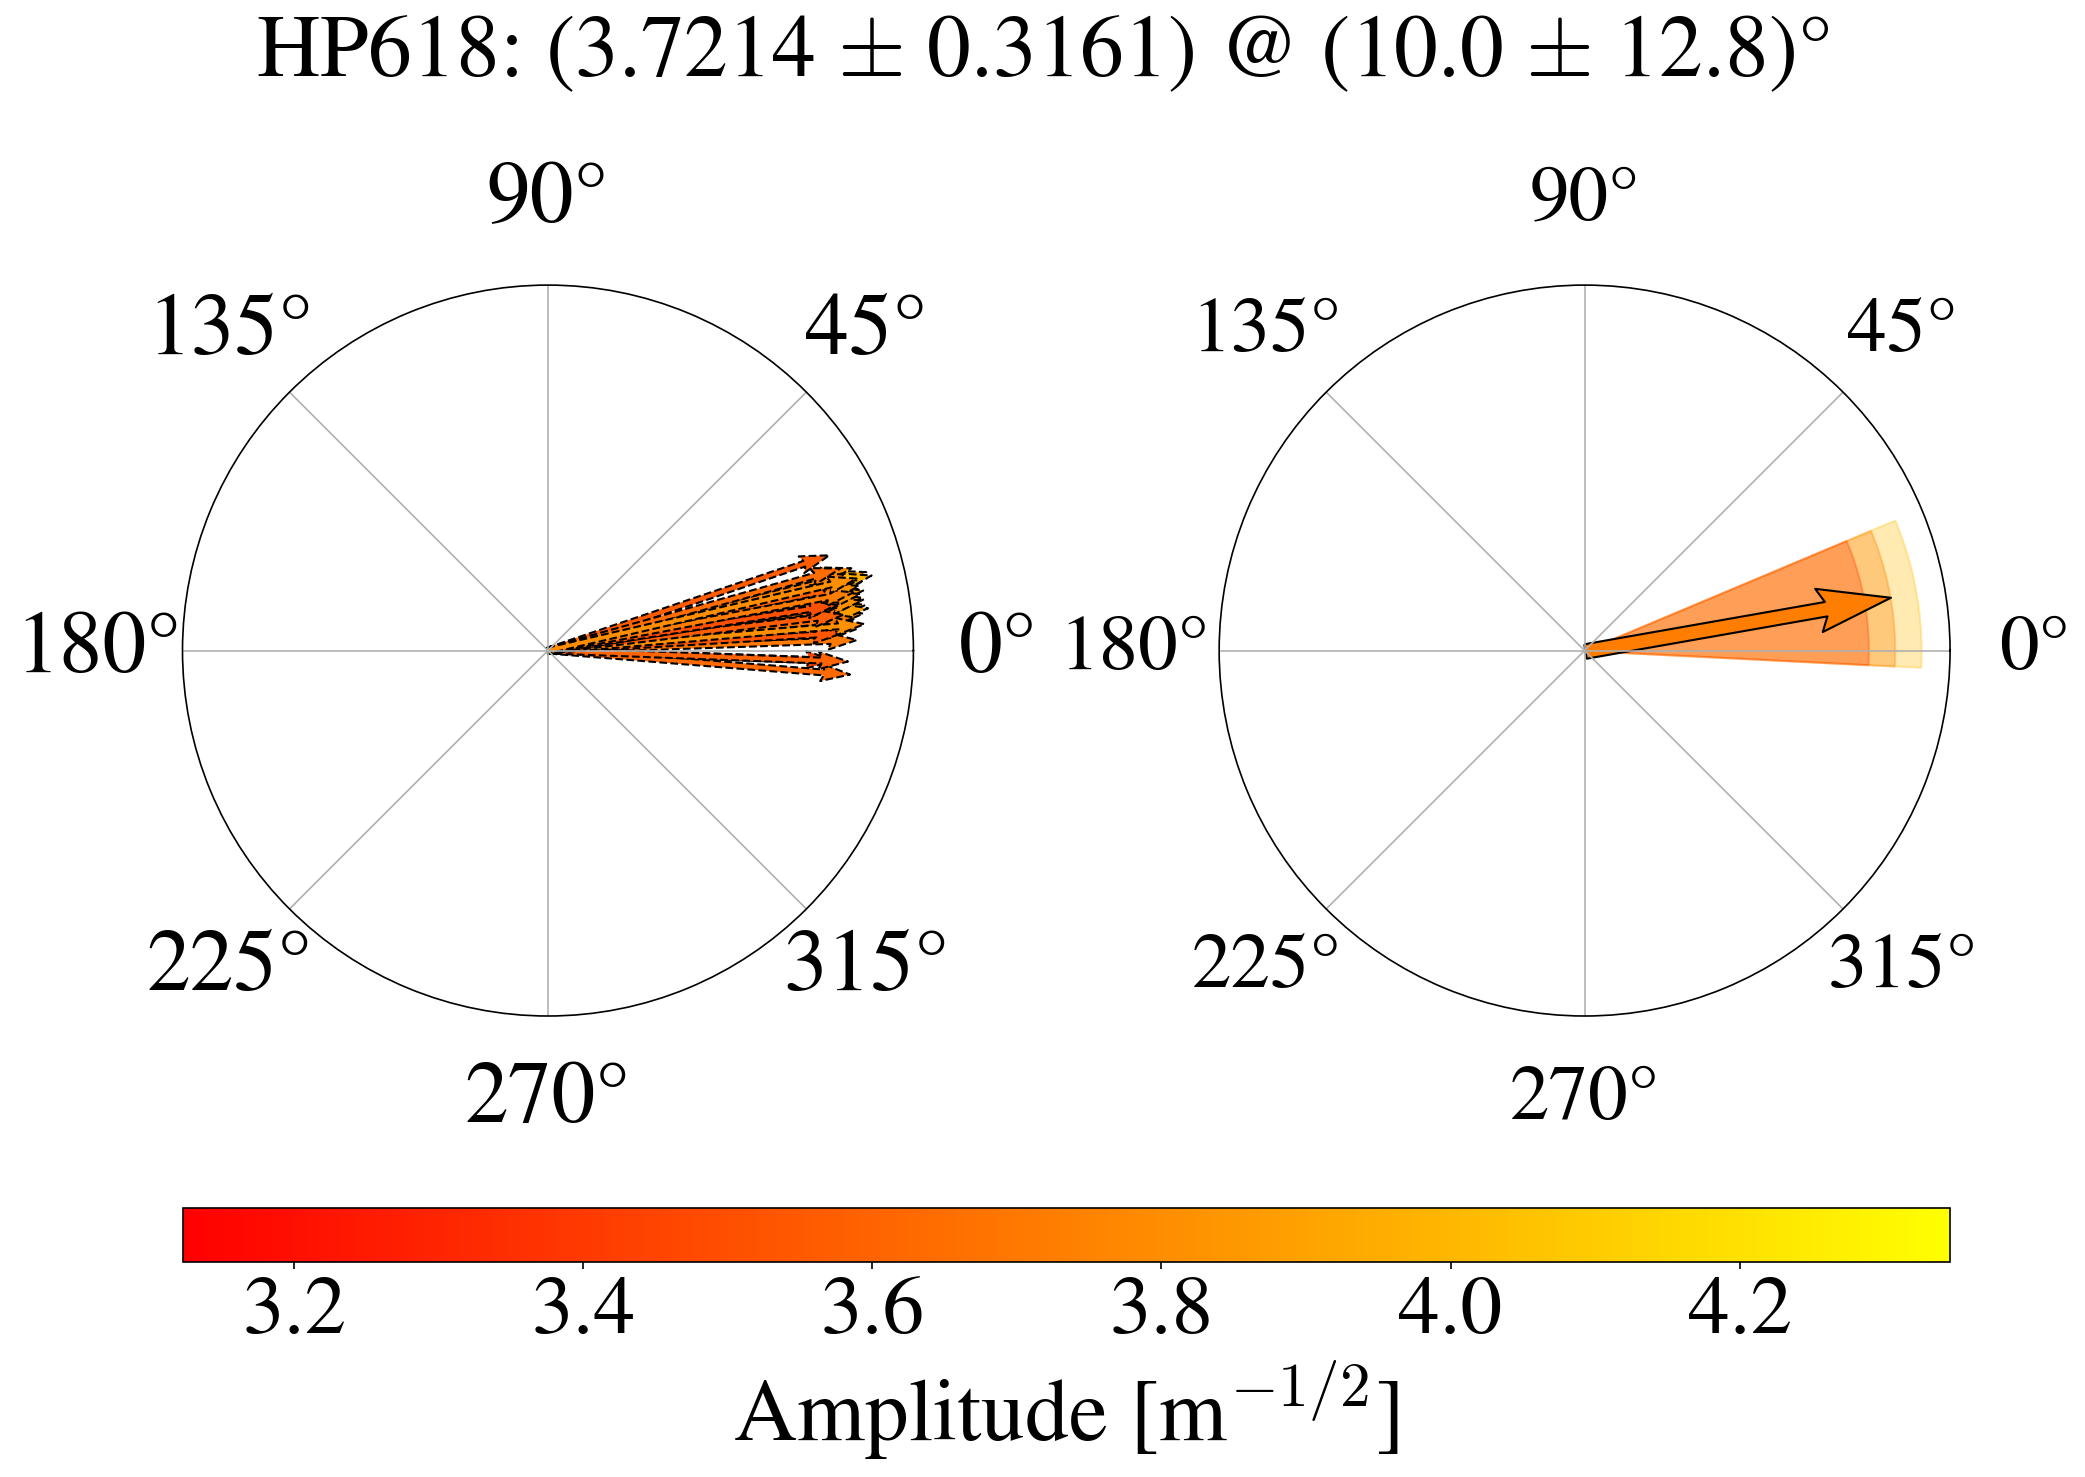

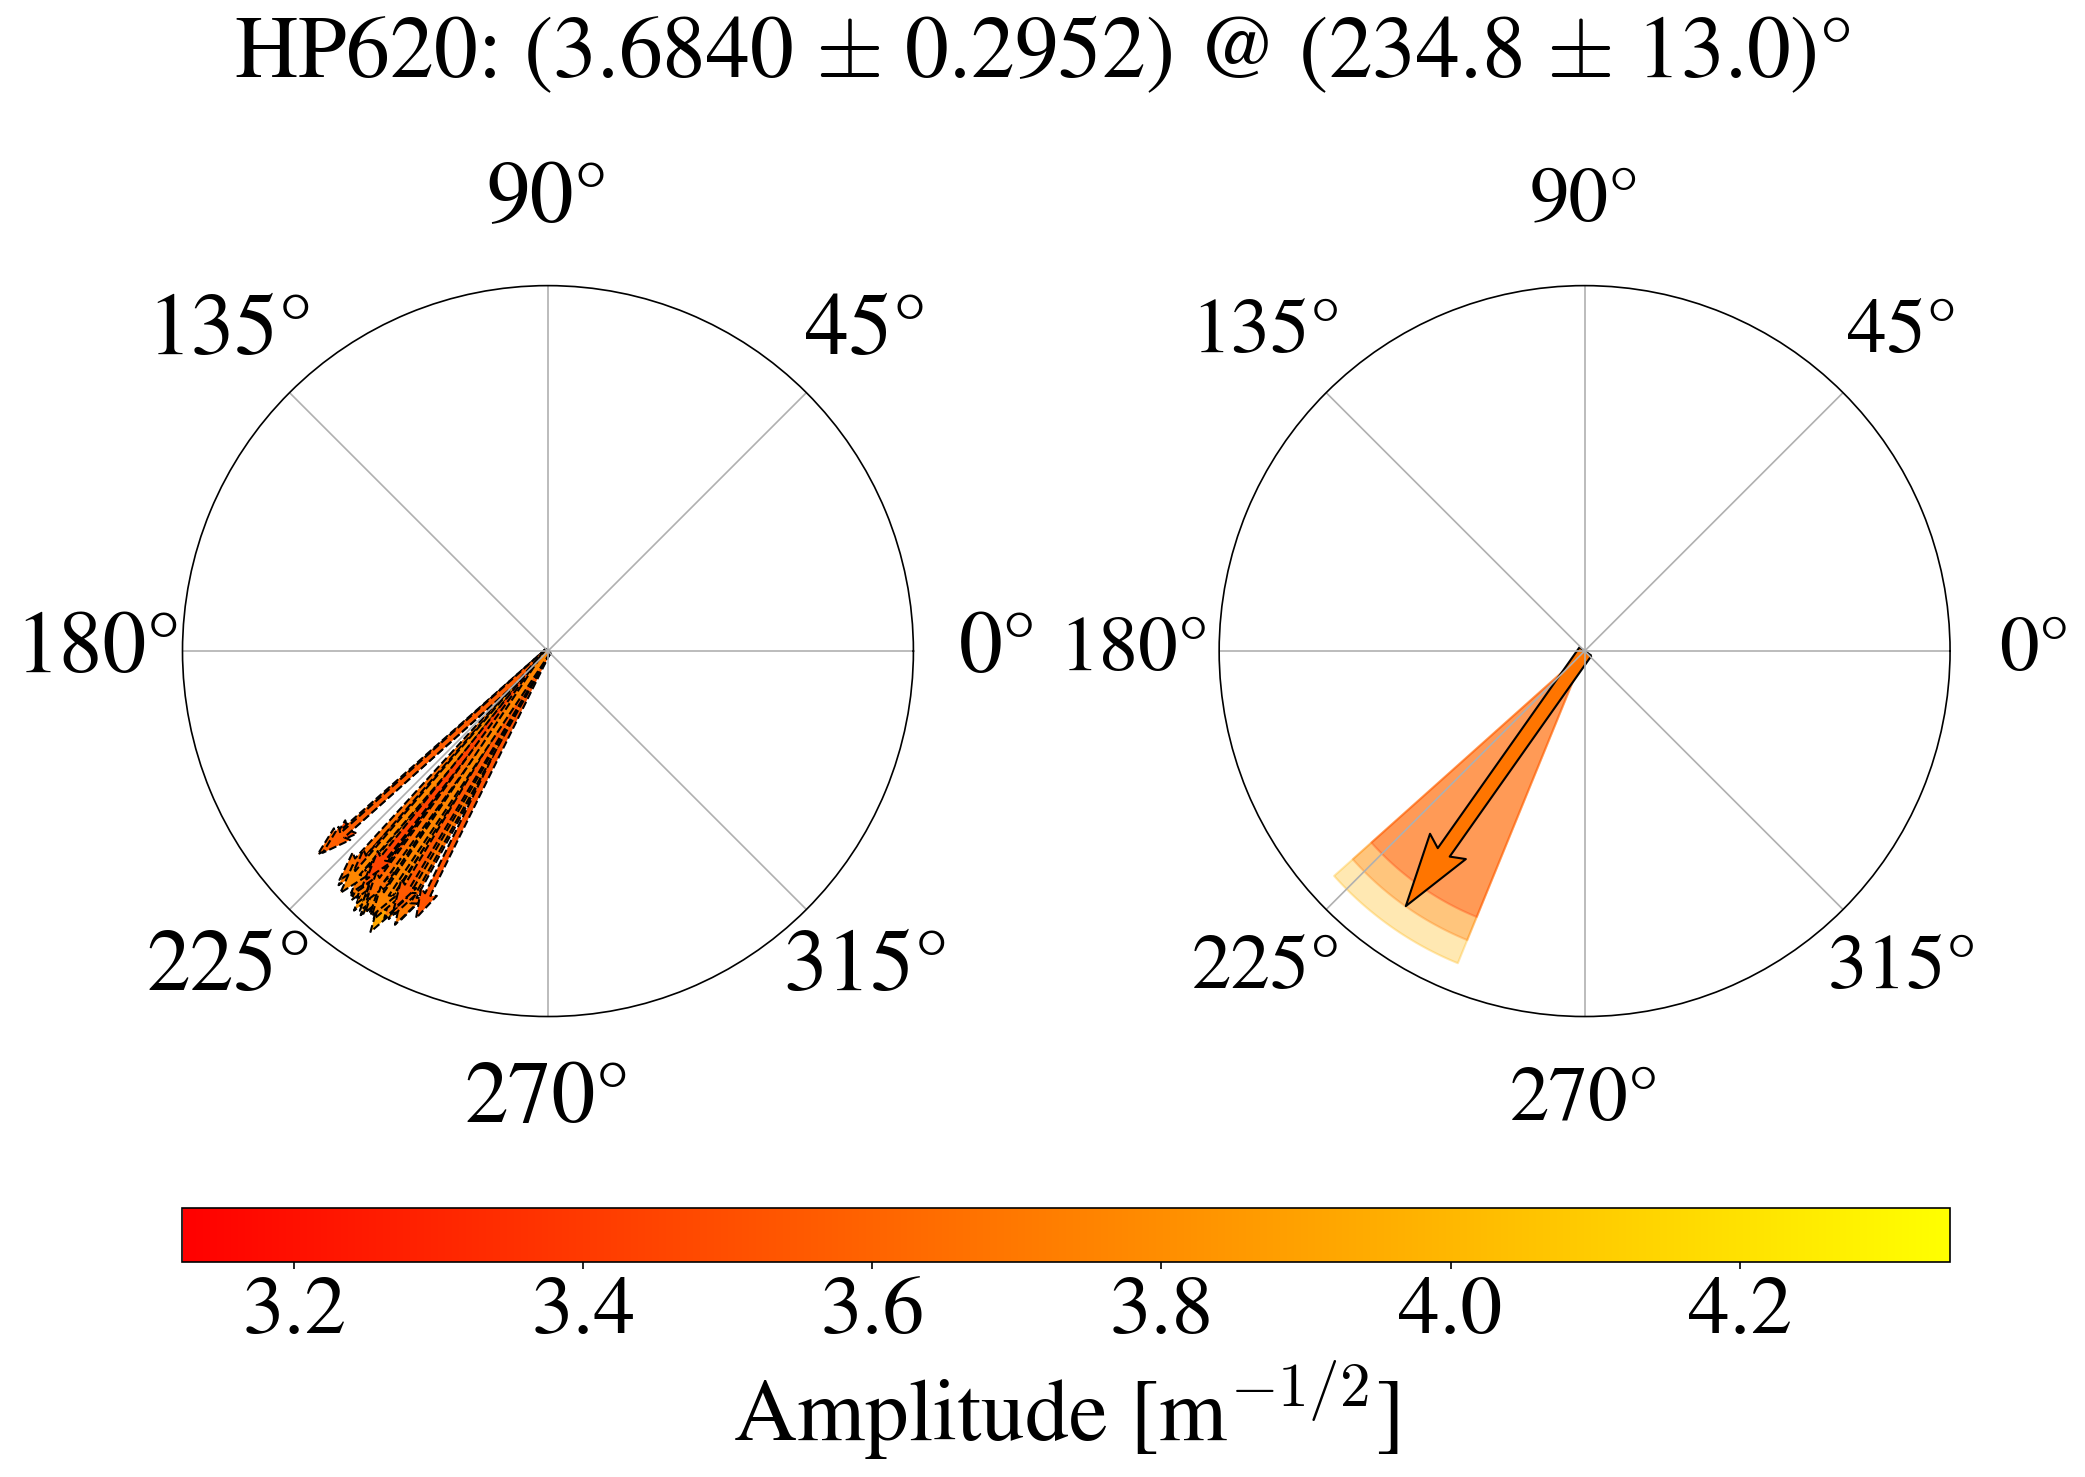

In [64]:
# Cycle through each bpm
nshow = 0

# bpmstoanalyze = ['R:HP620']

bpmstoanalyzecut = [ 'R:HP532',
       'R:HP602', 'R:HP604', 'R:HP606', 'R:HP608', 'R:HP610', 'R:HP612',
       'R:HP614', 'R:HP616', 'R:HP618', 'R:HP620', 'R:HP622', 'R:HP624',
       'R:HP626', 'R:HP628', 'R:HP630', 'R:HP632', 'R:HP634', 'R:HP636',
       'R:HP638', 'R:HP640']

for bpmi in bpmstoanalyzecut:
    h3000bareplot = df3all[(df3all['bpm'] == bpmi) & (df3all['sext-current'] == 0.0) & (df3all['abs(f_jklm)'] != 0.0)]
    
    fig = plt.figure(constrained_layout=False, figsize=(14,10))
    gs = mpl.gridspec.GridSpec(2, 2, figure=fig, height_ratios=[20, 1])
    fig.set_dpi(150)
    ax1 = fig.add_subplot(gs[0, 0], polar = True)
    ax2 = fig.add_subplot(gs[0, 1], polar = True)
    ax = fig.add_subplot(gs[1, :])
    
    #fig,(ax1, ax2)=plt.subplots(1, 2, figsize=(14,10), subplot_kw={'projection': 'polar'})
    #fig.suptitle(r'SUSSIX: $h_{3000}$ for bare machine at %s (%s)'%(bpmi, date), fontsize=22)
    # fig.suptitle(r'SUSSIX: $h_{3000}$ for bare machine at %s'%(bpmi), fontsize=26)
    
    
    barephase = np.array(h3000bareplot['psi_jklm'])
    bareamp = np.array(h3000bareplot['abs(h_jklm)'])*1000
    sci = np.array(h3000bareplot['sext'])
    
    # Plot bare machine Hamiltonian kick
    quibare0 = ax1.quiver(np.zeros(len(sci)), np.zeros(len(sci)),
                          barephase, bareamp,
                          color = cmap4(normalize4(bareamp)), cmap = cmap4,
                          angles = "xy", scale_units='xy', scale=1., alpha = 1,
                          edgecolor = 'black', linewidth = 1, width=.008, linestyle = 'dashed')

    #ax3.legend(fontsize = 24, framealpha = 1)
    # ax1.set_title('%d vectors'%len(bareamp), fontsize = 38)
    ax1.set_rticks([])
    ax1.tick_params(axis='x', labelsize = 42, pad = 30)
    ax1.set_rmin(0)
    ax1.set_rmax(1.1*max(bareamp))
    #ax1.grid(False)
    
    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=normalize4, cmap=cmap4), cax = ax, orientation = 'horizontal')
    cbar.ax.set_xlabel(r'Amplitude [m$^{-1/2}$]', fontsize = 42)
    cbar.ax.tick_params(axis = 'x',labelsize = 40)
    
    bareampmean = np.mean(bareamp)
    bareampstd = 3*np.std(bareamp)
    barephasemean = circmean(barephase)
    barephasestd = 3*circstd(barephase)
    barephasefill = np.linspace(barephasemean-barephasestd, barephasemean+barephasestd)
    
    ax2.fill_between(barephasefill, 0, bareampmean+bareampstd, 
                     color = cmap4(normalize4(bareampmean+bareampstd)), alpha = 0.3)
    ax2.fill_between(barephasefill, 0, bareampmean, 
                     color = cmap4(normalize4(bareampmean)), alpha = 0.3)
    ax2.fill_between(barephasefill, 0, bareampmean-bareampstd, 
                     color = cmap4(normalize4(bareampmean-bareampstd)), alpha = 0.3)

    quibare0 = ax2.quiver(0, 0,
                          barephasemean, bareampmean,
                          color=cmap4(normalize4(bareampmean)), cmap = cmap4,
                          angles = "xy", scale_units='xy', scale=1., alpha = 1,
                          edgecolor = 'black', linewidth = 1, width=.02, linestyle = 'solid', 
                          label = r'$h_{3000}^{(bare)}$')
    
    fig.suptitle('%s: (%.4f $\pm$ %.4f) @ (%.1f $\pm$ %.1f)°'%(bpmi[2:],bareampmean, bareampstd, barephasemean*180/np.pi, barephasestd*180/np.pi), 
                  fontsize = 42)
    ax2.set_rticks([])
    ax2.tick_params(axis='x', labelsize = 38, pad = 30)
    ax2.set_rmin(0)
    ax2.set_rmax(1.1*max(bareamp))
    #ax2.grid(False)
    
    # fig.patch.set_facecolor('white')
    plt.tight_layout()

    # plt.savefig('bare-machine-analysis/baremachine_%s.png'%bpmi[-5:])

    plt.savefig('article-plots/baremachine_%s.pdf'%bpmi[-5:])
    
    if nshow < 10:
        plt.show()
        nshow = nshow + 1
    else:
        break

    plt.close()
    
    # break
    #print(h3000bareplot)

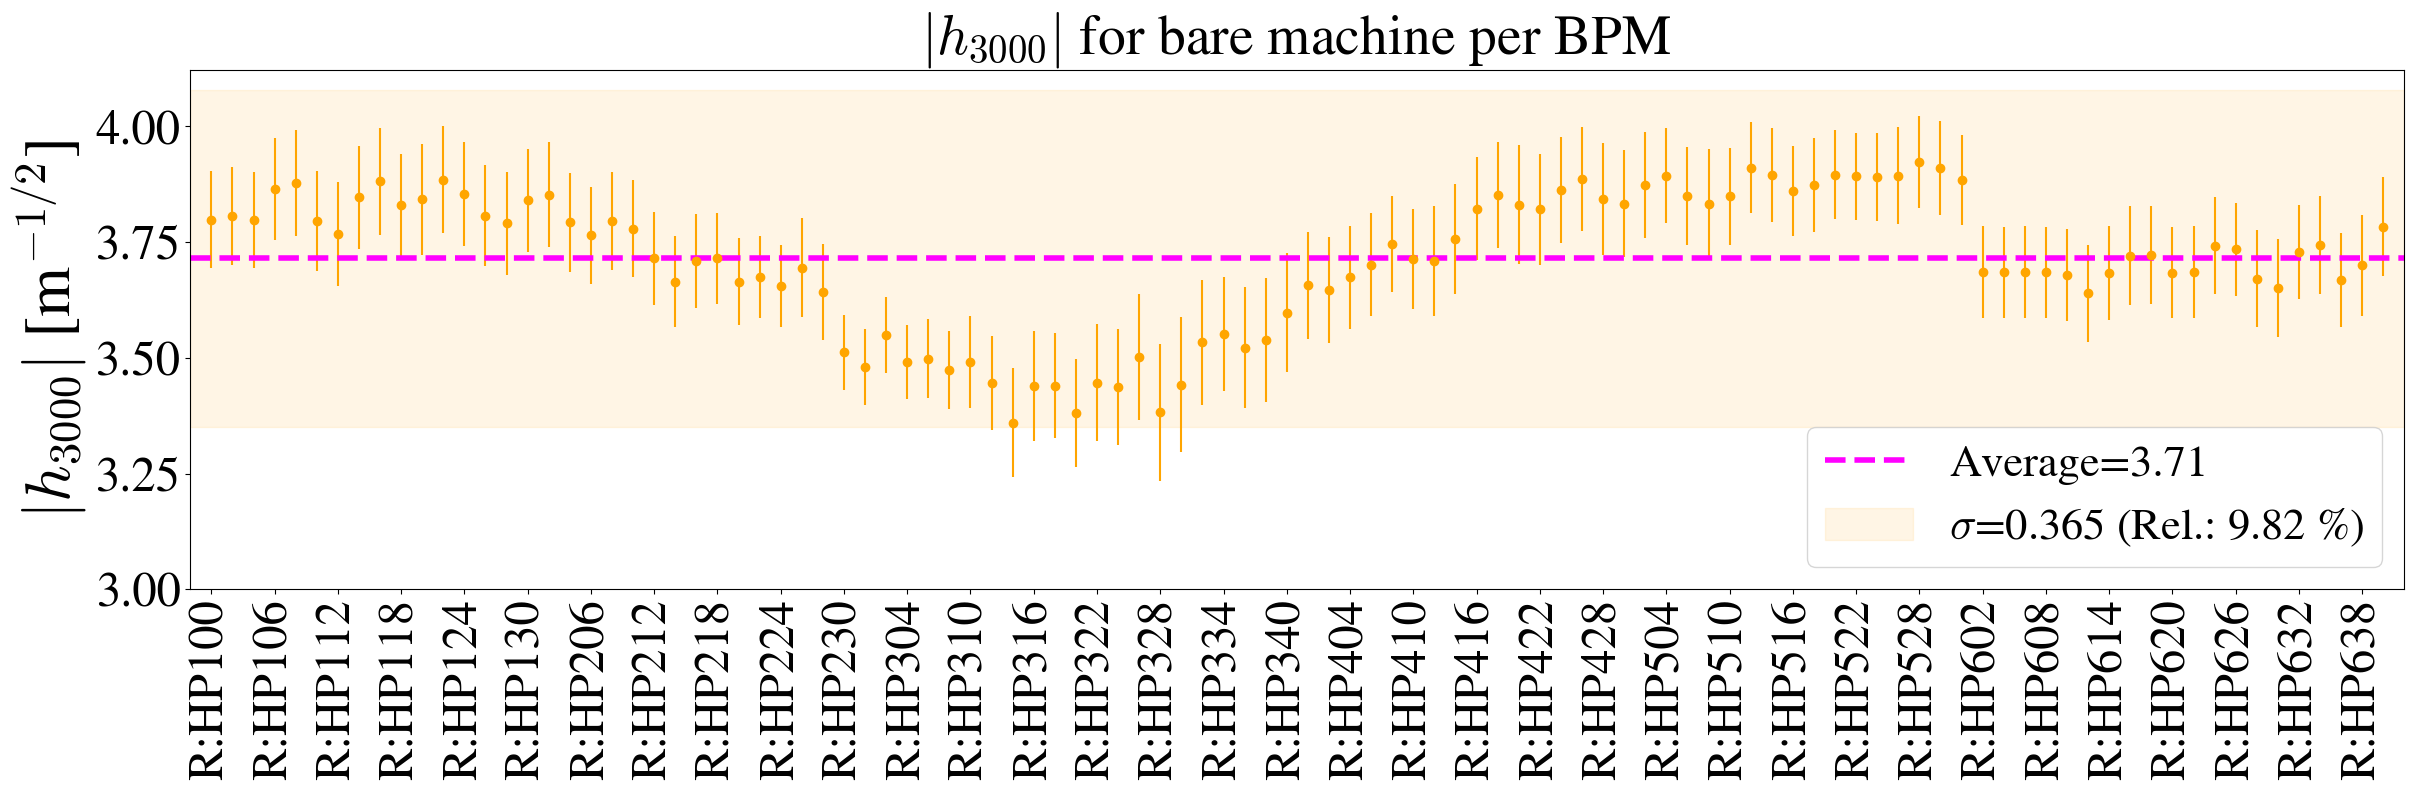

In [31]:
fig,ax=plt.subplots(1,1,figsize=(24,8))

dfbare = df3all[(df3all['sext-current']==0) & (df3all['abs(f_jklm)'] != 0.0)]

for bpmi in bpmstoanalyze:
    
    dfbarei = dfbare[dfbare['bpm'] == bpmi]

    ax.errorbar([bpmi], np.mean(dfbarei['abs(h_jklm)'])*1000, 
                yerr = np.std(dfbarei['abs(h_jklm)'])*1000,
                fmt = 'o', c = 'orange')
    
#ax.errorbar(range(len(dfbare['bpm'])), dfbare['amplitude'], fmt = 'o', c = 'orange')    
h1020mean = np.mean(dfbare['abs(h_jklm)'])*1000
h1020std = np.std(dfbare['abs(h_jklm)'])*1000

sn = 2

ax.axhline(h1020mean, c= 'fuchsia', linewidth = 4,
            label = 'Average=%.3g'%h1020mean, linestyle='dashed')
ax.axhspan(h1020mean+sn*h1020std, h1020mean-sn*h1020std,
           color = 'orange', alpha = 0.1, 
           label = r'$\sigma$=%.3g (Rel.: %.3g %%)'%(sn*h1020std,sn*h1020std/h1020mean*100))

#ax.set_xticks(dfbare['bpm'][::10],dfbare['bpm'][::10])
#ax.set_xticklabels(ax.get_xticklabels()[::5])
#ax.set_xticks(ax.get_xticklabels()[::5])
ticks = ax.get_xticks()
labels = [i.get_text() for i in ax.get_xticklabels()]
ax.set_xticks(ticks[::3],labels[::3])

ax.legend(fontsize = 32, loc = 'lower right')
#ax.set_title(r'$|h_{3000}|$ for bare machine per BPM (Window: %s) (%s)'%(windowsus, date),fontsize=40)

ax.set_title(r'$|h_{3000}|$ for bare machine per BPM ',fontsize=40)

ax.tick_params(axis='x', labelsize = 35,labelrotation=90)
#plt.xticks(range(len(dfbare['bpm'])), dfbare['bpm'])
ax.tick_params(axis='y', labelsize = 35)
ax.set_ylabel(r'$|h_{3000}|$ [m$^{-1/2}$]', fontsize=46)
count=len(bpmstoanalyze)
ax.set_xlim(-1,count)
ax.set_ylim(3)
    
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()
plt.close()

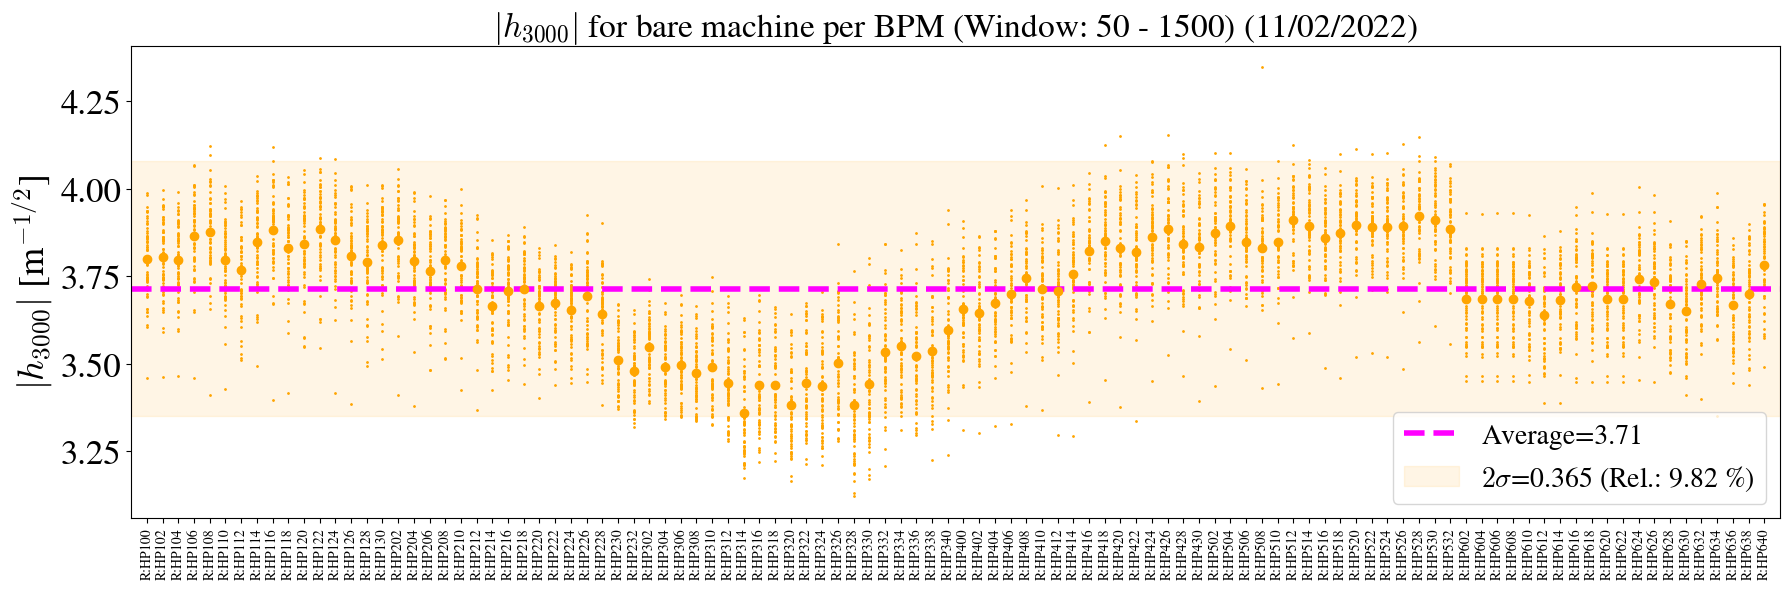

In [32]:
fig,ax=plt.subplots(1,1,figsize=(18,6))

dfbare = df3all[(df3all['sext-current']==0) & (df3all['abs(f_jklm)'] != 0.0)]

for bpmi in bpmstoanalyze:
    
    dfbarei = dfbare[dfbare['bpm'] == bpmi]
    ax.scatter(np.repeat([bpmi],len(dfbarei['abs(h_jklm)'])), dfbarei['abs(h_jklm)']*1000,
               s = 1, marker = 'o', c = 'orange')
    
    ax.errorbar([bpmi], np.mean(dfbarei['abs(h_jklm)'])*1000, 
                yerr = np.std(dfbarei['abs(h_jklm)'])/np.sqrt(len(dfbarei)),
                fmt = 'o', c = 'orange')
    
#ax.errorbar(range(len(dfbare['bpm'])), dfbare['amplitude'], fmt = 'o', c = 'orange')    
h3000mean = np.mean(dfbare['abs(h_jklm)'])*1000
h3000std = np.std(dfbare['abs(h_jklm)'])*1000

sn = 2

ax.axhline(h3000mean, c= 'fuchsia', linewidth = 4,
            label = 'Average=%.3g'%h3000mean, linestyle='dashed')

ax.axhspan(h3000mean+sn*h3000std, h3000mean-sn*h3000std,
           color = 'orange', alpha = 0.1, 
           label = r'$%i \sigma$=%.3g (Rel.: %.3g %%)'%(sn, sn*h3000std,sn*h3000std/h3000mean*100))


ax.legend(fontsize = 20, loc = 4)
ax.set_title(r'$|h_{3000}|$ for bare machine per BPM (Window: %d - %d) (%s)'%(window[0], window[1], date),
             fontsize=24)
ax.tick_params(axis='x', labelrotation=90)
ax.tick_params(axis='y', labelsize = 25)
#plt.xticks(range(len(dfbare['bpm'])), dfbare['bpm'])
ax.set_ylabel(r'$|h_{3000}|$ [m$^{-1/2}$]', fontsize=26)
count=len(bpmstoanalyze)
ax.set_xlim(-1,count)

    
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()
plt.close()

In [33]:
ss = np.load('ss.npy')
bpm_names = np.load('bpms.npy')
f3000s_madx = np.load('f3000s.npy')
h3000s_madx = np.load('h3000s.npy')

bpmi_to_ss = dict(zip(bpm_names, ss))

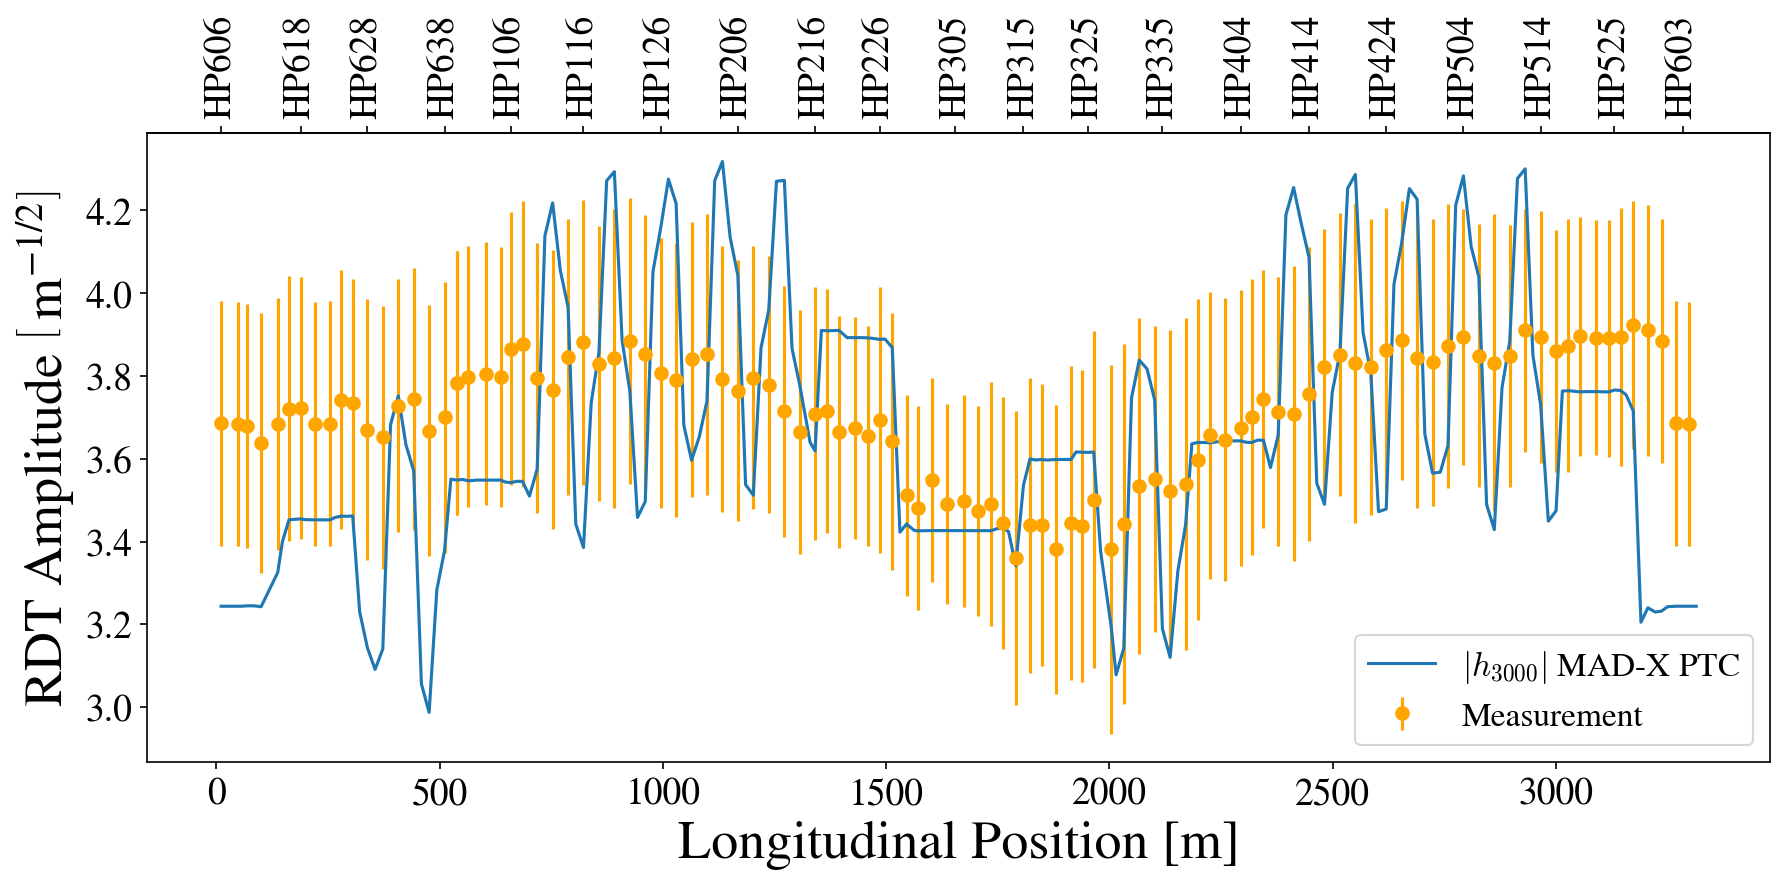

In [34]:
fig,ax = plt.subplots(1,1,figsize = (12,6))

#-----------------------------------------------
#-----------------------------------------------
for bpmi in bpmstoanalyze:
    
    dfbarei = dfbare[dfbare['bpm'] == bpmi]

    ssi = bpmi_to_ss[bpmi[2:]]
    
    ax.errorbar([ssi], np.mean(dfbarei['abs(h_jklm)'])*1000, 
                yerr = 3*np.std(dfbarei['abs(h_jklm)'])*1000,
                fmt = 'o', c = 'orange')

ax.errorbar([ssi], np.mean(dfbarei['abs(h_jklm)'])*1000, 
                yerr = 3*np.std(dfbarei['abs(h_jklm)'])*1000,
                fmt = 'o', c = 'orange', label = 'Measurement')
#ax.errorbar(range(len(dfbare['bpm'])), dfbare['amplitude'], fmt = 'o', c = 'orange')    
h1020mean = np.mean(dfbare['abs(h_jklm)'])*1000
h1020std = np.std(dfbare['abs(h_jklm)'])*1000

sn = 2

# ax.axhline(h1020mean, c= 'fuchsia', linewidth = 4,
#             label = 'Average=%.3g'%h1020mean, linestyle='dashed')
# ax.axhspan(h1020mean+sn*h1020std, h1020mean-sn*h1020std,
#            color = 'orange', alpha = 0.1, 
#            label = r'$\sigma$=%.3g (Rel.: %.3g %%)'%(sn*h1020std,sn*h1020std/h1020mean*100))

#-----------------------------------------------
#-----------------------------------------------

ax.plot(ss,np.abs(h3000s_madx), label = r'$|h_{3000}|$ MAD-X PTC')
# ax.plot(ss,np.abs(f3000s), label = r'$|f_{3000}|$')
#ax.set_xlim(0,max(mad.table.twissrdt['s']))

ax.set_xlabel('Longitudinal Position [m]',fontsize = 26)
ax.set_ylabel(r'RDT Amplitude $\mathregular{\left[ \, m^{-1/2} \right] }$',fontsize = 26)

ax.tick_params(axis='both', labelsize=18)

ax.legend(loc = 'lower right',fontsize = 16)

axt = ax.secondary_xaxis(location = 'top')
axt.set_xlim(ax.get_xlim())

axt.set_xticks(ss[::10])
axt.set_xticklabels(bpm_names[::10],rotation = 90,fontsize = 18)

fig.set_dpi(150)

plt.tight_layout()
plt.savefig('rdts-madx-nodate.png')
plt.show()

plt.close()


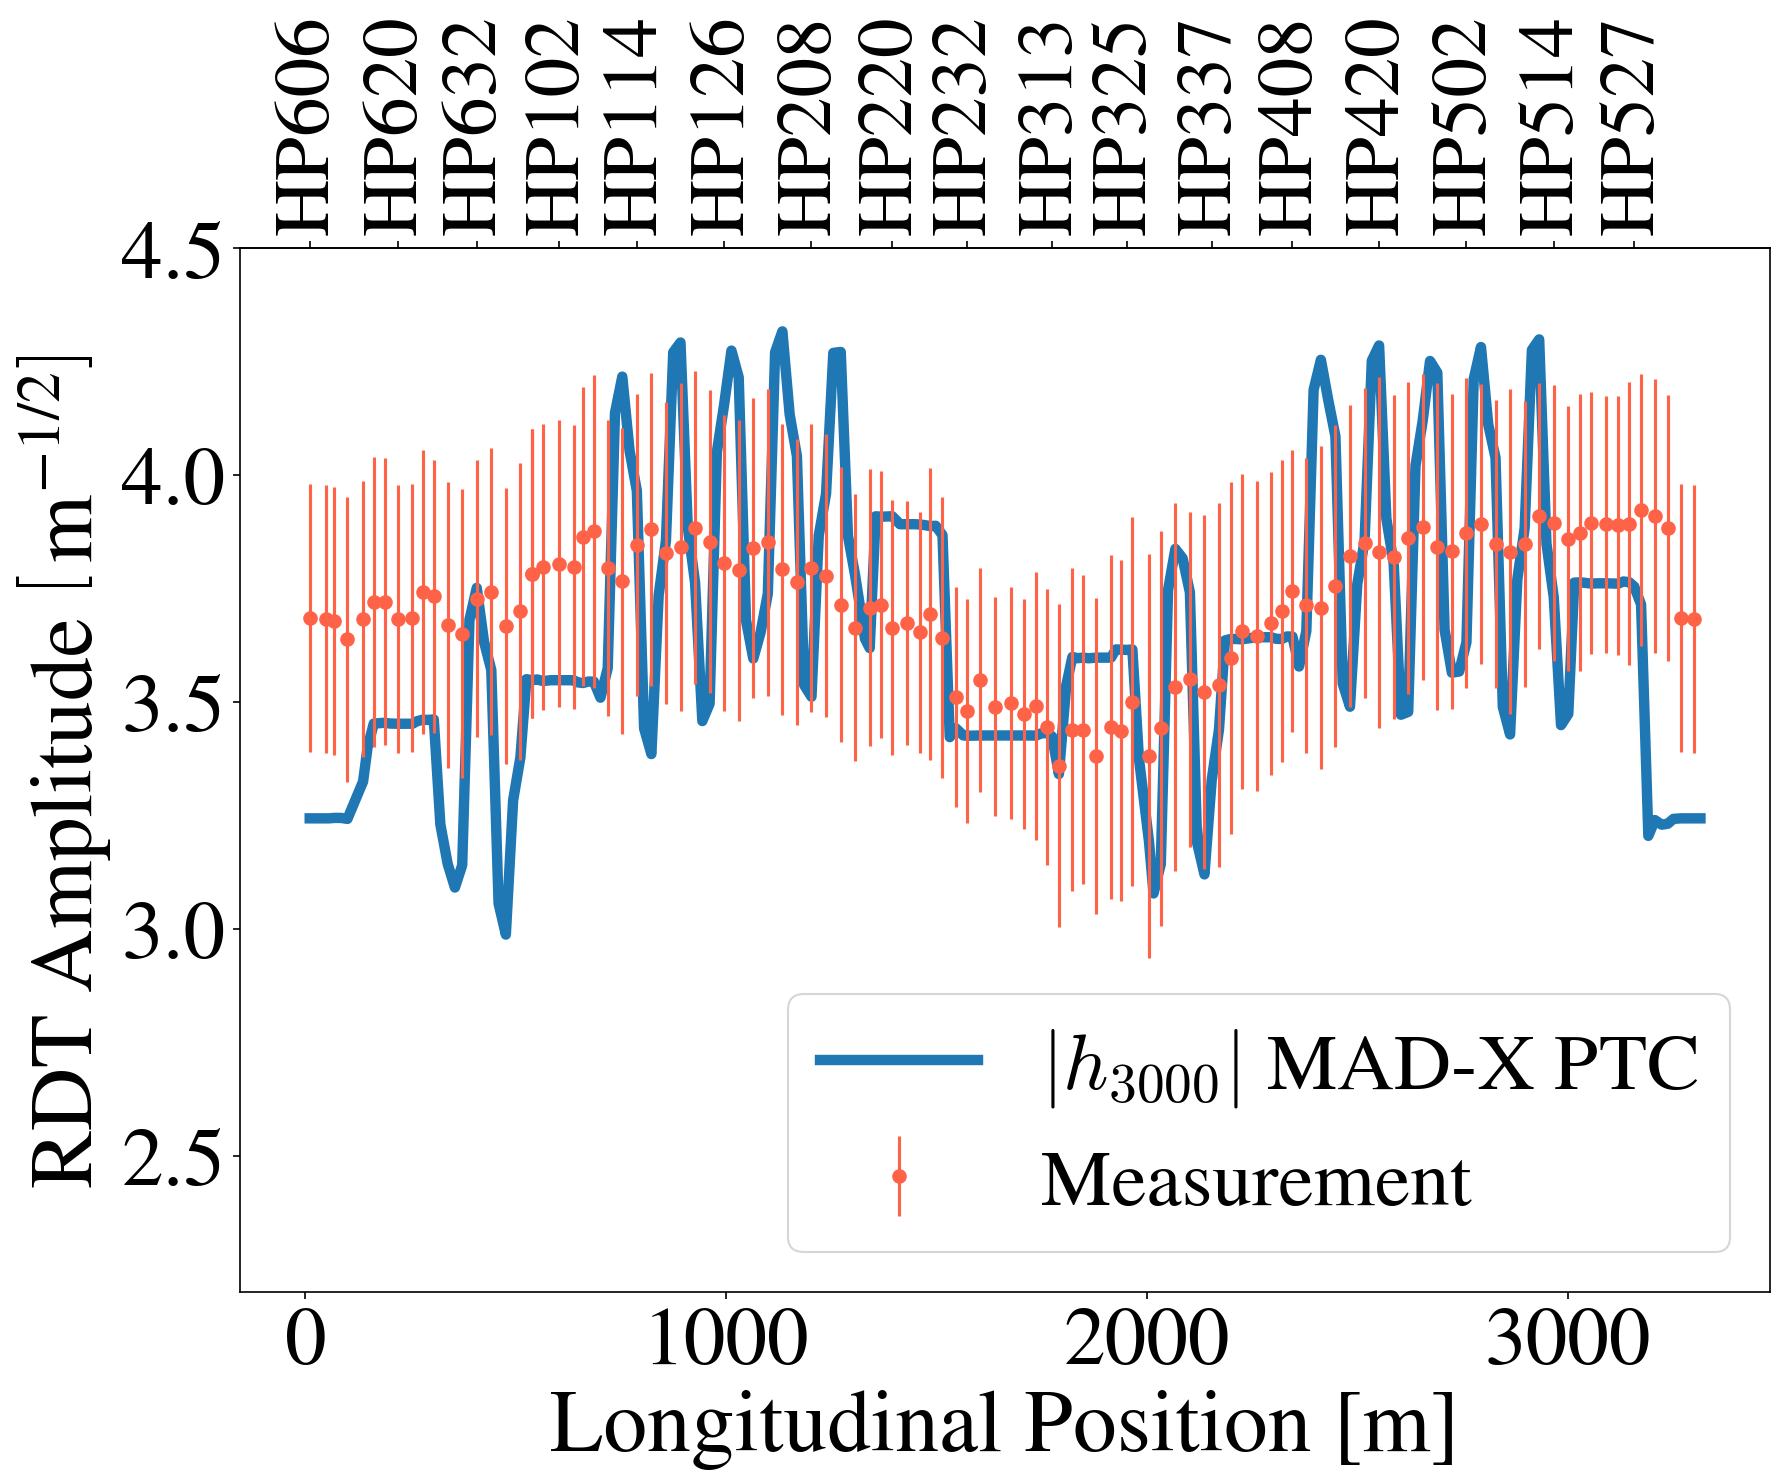

In [60]:
fig,ax = plt.subplots(1,1,figsize = (12,10))

ax.plot(ss,np.abs(h3000s_madx), label = r'$|h_{3000}|$ MAD-X PTC',linewidth = 5)

#-----------------------------------------------
#-----------------------------------------------
for bpmi in bpmstoanalyze:
    
    dfbarei = dfbare[dfbare['bpm'] == bpmi]

    ssi = bpmi_to_ss[bpmi[2:]]
    
    ax.errorbar([ssi], np.mean(dfbarei['abs(h_jklm)'])*1000, 
                yerr = 3*np.std(dfbarei['abs(h_jklm)'])*1000,
                fmt = 'o', c = 'tomato')

ax.errorbar([ssi], np.mean(dfbarei['abs(h_jklm)'])*1000, 
                yerr = 3*np.std(dfbarei['abs(h_jklm)'])*1000,
                fmt = 'o', c = 'tomato', label = 'Measurement')
#ax.errorbar(range(len(dfbare['bpm'])), dfbare['amplitude'], fmt = 'o', c = 'orange')    
h1020mean = np.mean(dfbare['abs(h_jklm)'])*1000
h1020std = np.std(dfbare['abs(h_jklm)'])*1000

sn = 2

# ax.axhline(h1020mean, c= 'fuchsia', linewidth = 4,
#             label = 'Average=%.3g'%h1020mean, linestyle='dashed')
# ax.axhspan(h1020mean+sn*h1020std, h1020mean-sn*h1020std,
#            color = 'orange', alpha = 0.1, 
#            label = r'$\sigma$=%.3g (Rel.: %.3g %%)'%(sn*h1020std,sn*h1020std/h1020mean*100))

#-----------------------------------------------
#-----------------------------------------------


# ax.plot(ss,np.abs(f3000s), label = r'$|f_{3000}|$')
#ax.set_xlim(0,max(mad.table.twissrdt['s']))
ax.set_ylim(2.2,4.5)

ax.set_xlabel('Longitudinal Position [m]',fontsize = 42)
ax.set_ylabel(r'RDT Amplitude $\mathregular{\left[ \, m^{-1/2} \right] }$',fontsize = 42)

ax.tick_params(axis='both', labelsize=40)

ax.legend(loc = 'lower right',fontsize = 38)

axt = ax.secondary_xaxis(location = 'top')
axt.set_xlim(ax.get_xlim())

axt.set_xticks(ss[::12])
axt.set_xticklabels(bpm_names[::12],rotation = 90,fontsize = 38)

fig.set_dpi(150)

plt.tight_layout()
plt.savefig('article-plots/h3000_bpms.pdf')
plt.show()

plt.close()


In [12]:
bpm_names

array(['HP606', 'HP607', 'HP608', 'HP609', 'HP610', 'HP611', 'HP612',
       'HP614', 'HP615', 'HP616', 'HP618', 'HP619', 'HP620', 'HP621',
       'HP622', 'HP623', 'HP624', 'HP625', 'HP626', 'HP627', 'HP628',
       'HP629', 'HP630', 'HP631', 'HP632', 'HP633', 'HP634', 'HP635',
       'HP636', 'HP637', 'HP638', 'HP639', 'HP640', 'HP641', 'HP100',
       'HP101', 'HP102', 'HP103', 'HP104', 'HP105', 'HP106', 'HP107',
       'HP108', 'HP109', 'HP110', 'HP111', 'HP112', 'HP113', 'HP114',
       'HP115', 'HP116', 'HP117', 'HP118', 'HP119', 'HP120', 'HP121',
       'HP122', 'HP123', 'HP124', 'HP125', 'HP126', 'HP127', 'HP128',
       'HP129', 'HP130', 'HP201', 'HP202', 'HP203', 'HP204', 'HP205',
       'HP206', 'HP207', 'HP208', 'HP209', 'HP210', 'HP211', 'HP212',
       'HP213', 'HP214', 'HP215', 'HP216', 'HP217', 'HP218', 'HP219',
       'HP220', 'HP221', 'HP222', 'HP223', 'HP224', 'HP225', 'HP226',
       'HP227', 'HP228', 'HP229', 'HP230', 'HP231', 'HP232', 'HP302',
       'HP303', 'HP3

In [63]:
bpmstoanalyze

array(['R:HP100', 'R:HP102', 'R:HP104', 'R:HP106', 'R:HP108', 'R:HP110',
       'R:HP112', 'R:HP114', 'R:HP116', 'R:HP118', 'R:HP120', 'R:HP122',
       'R:HP124', 'R:HP126', 'R:HP128', 'R:HP130', 'R:HP202', 'R:HP204',
       'R:HP206', 'R:HP208', 'R:HP210', 'R:HP212', 'R:HP214', 'R:HP216',
       'R:HP218', 'R:HP220', 'R:HP222', 'R:HP224', 'R:HP226', 'R:HP228',
       'R:HP230', 'R:HP232', 'R:HP302', 'R:HP304', 'R:HP306', 'R:HP308',
       'R:HP310', 'R:HP312', 'R:HP314', 'R:HP316', 'R:HP318', 'R:HP320',
       'R:HP322', 'R:HP324', 'R:HP326', 'R:HP328', 'R:HP330', 'R:HP332',
       'R:HP334', 'R:HP336', 'R:HP338', 'R:HP340', 'R:HP400', 'R:HP402',
       'R:HP404', 'R:HP406', 'R:HP408', 'R:HP410', 'R:HP412', 'R:HP414',
       'R:HP416', 'R:HP418', 'R:HP420', 'R:HP422', 'R:HP424', 'R:HP426',
       'R:HP428', 'R:HP430', 'R:HP502', 'R:HP504', 'R:HP506', 'R:HP508',
       'R:HP510', 'R:HP512', 'R:HP514', 'R:HP516', 'R:HP518', 'R:HP520',
       'R:HP522', 'R:HP524', 'R:HP526', 'R:HP528', 